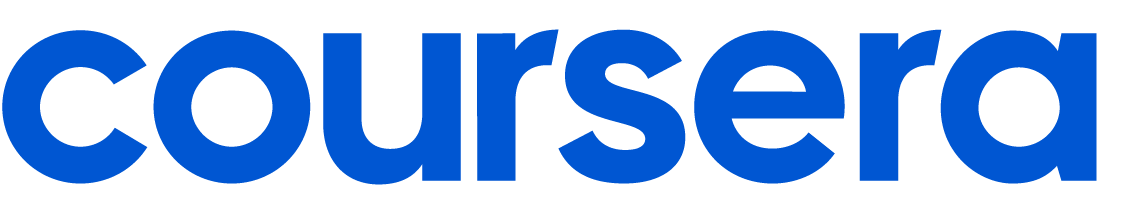

# Welcome to the Data Science Coding Challenge!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [147]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
pd.set_option('future.no_silent_downcasting', True)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [150]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, \
ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, classification_report

from sklearn.inspection import permutation_importance

import statsmodels.api as sm

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler 
 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

from xgboost import plot_importance

from sklearn.feature_selection import RFE, SelectFromModel, VarianceThreshold
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.pipeline import Pipeline

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [152]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [153]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [155]:
print(train_df.info())
print()
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [156]:
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


**Checking missing values**

In [158]:
print("Number of missing values in 'train_df':")
print(train_df.isna().sum())
print()
print("Number of missing values in 'test_df':")
print(test_df.isna().sum())

Number of missing values in 'train_df':
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

Number of missing values in 'test_df':
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
Viewing

There are no missing values in the both datasets.

# **Cleaning data** #

Two variables have values which include space characters ' '. In order to avoid future problems, I would be best to replace the space characters with underscores before I continue with modeling. 
The identified variables with blank characters among its possible values are: 'PaymentMethod' and 'ContentType'.
 

In [162]:
# Check the possible values of 'PaymentMethod' variable
print(train_df['PaymentMethod'].value_counts())
print(test_df['PaymentMethod'].value_counts())

PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64
PaymentMethod
Mailed check        26166
Credit card         26134
Electronic check    26127
Bank transfer       26053
Name: count, dtype: int64


This variable can have 4 different values, all with space characters.
Let's replace them with underscores, and check the outcome.

In [164]:
replacements = {'Electronic check':'ElectronicCheck', 'Credit card':'CreditCard',
                'Bank transfer':'BankTransfer', 'Mailed check':'MailedCheck'}

train_df.replace(replacements, inplace=True)
test_df.replace(replacements, inplace=True)

print(train_df['PaymentMethod'].value_counts())
print(test_df['PaymentMethod'].value_counts())

PaymentMethod
ElectronicCheck    61313
CreditCard         60924
BankTransfer       60797
MailedCheck        60753
Name: count, dtype: int64
PaymentMethod
MailedCheck        26166
CreditCard         26134
ElectronicCheck    26127
BankTransfer       26053
Name: count, dtype: int64


In [165]:
# Check the possible values of 'ContentType' variable
print(train_df['ContentType'].value_counts())
print(test_df['ContentType'].value_counts())

ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64
ContentType
Both        35087
Movies      34848
TV Shows    34545
Name: count, dtype: int64


In [166]:
# Change the 'TV Shows' value to 'TV_Shows' and check the outcome
replacement = {'TV Shows':'TVShows'}

train_df.replace(replacement, inplace=True)
test_df.replace(replacement, inplace=True)

print(train_df['ContentType'].value_counts())
print(test_df['ContentType'].value_counts())

ContentType
Both       81737
TVShows    81145
Movies     80905
Name: count, dtype: int64
ContentType
Both       35087
Movies     34848
TVShows    34545
Name: count, dtype: int64


**Outliers in continuos variables**
No matter that tree-based models are resistant to outliers, I will replace them with values in order not to skew the process of learning.

In [168]:
train_df['AccountAge'].describe()

count    243787.000000
mean         60.083758
std          34.285143
min           1.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: AccountAge, dtype: float64

60.0


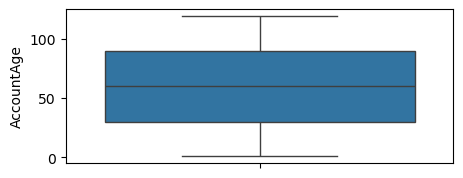

In [169]:
print(train_df['AccountAge'].quantile(0.75) - train_df['AccountAge'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(train_df['AccountAge']);

No outliers in 'AccountAge'.

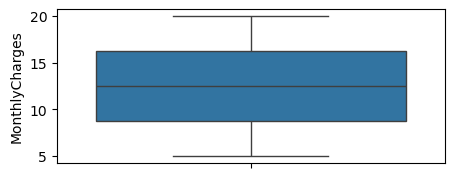

In [171]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['MonthlyCharges']);

No outliers in 'MonthlyCharges'.

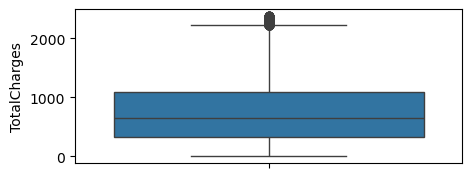

In [173]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['TotalCharges']);

In [174]:
IQR_train = train_df['TotalCharges'].quantile(0.75) - train_df['TotalCharges'].quantile(0.25)
print('IQR train:', IQR_train)
lower_train = train_df['TotalCharges'].quantile(0.25) - 1.5*IQR_train
print('lower:', lower_train)
upper_train = train_df['TotalCharges'].quantile(0.75) + 1.5*IQR_train
print('upper:', upper_train)
print()
IQR_test = test_df['TotalCharges'].quantile(0.75) - test_df['TotalCharges'].quantile(0.25)
print('IQR test:', IQR_test)
lower_test = test_df['TotalCharges'].quantile(0.25) - 1.5*IQR_test
print('lower:', lower_test)
upper_test = test_df['TotalCharges'].quantile(0.75) + 1.5*IQR_test
print('upper:', upper_test)
print()
train_df_filtered = train_df[train_df['TotalCharges']<0]  #check for negative values
print(train_df_filtered.count())
print()
train_df_filtered = train_df[(train_df['TotalCharges']<lower_train) | (train_df['TotalCharges']>upper_train)]
print(train_df_filtered.count())
test_df_filtered = test_df[(test_df['TotalCharges']<lower_test) | (test_df['TotalCharges']>upper_test)]
print(test_df_filtered.count())

#print()
#train_df_sorted = train_df_filtered.sort_values(['TotalCharges'], ascending=False)
#train_df_filtered = train_df[train_df['TotalCharges']>upper]
#print(train_df_filtered.count())

IQR train: 760.1703351242627
lower: -811.1084761822483
upper: 2229.5728643148022

IQR test: 752.3054482055478
lower: -799.4966292737473
upper: 2209.725163548444

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

AccountAge                  741
MonthlyCharges              741
TotalCharges                741
SubscriptionType            741
PaymentMethod               741
PaperlessBilling            741
Co

There is small number of outliers in 'TotalCharges', so I will leave them.

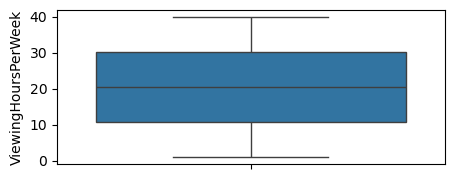

In [176]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['ViewingHoursPerWeek']);

No outliers in 'ViewingHoursPerWeek'.

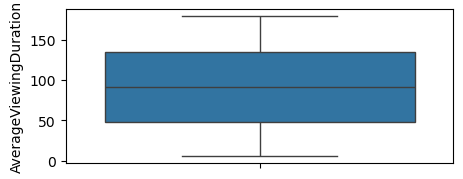

In [178]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['AverageViewingDuration']);

No outliers in 'AverageViewingDuration'.

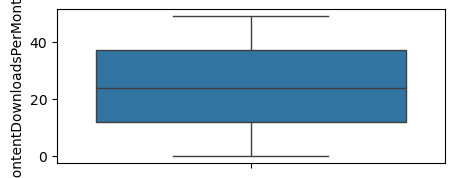

In [180]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['ContentDownloadsPerMonth']);	

No outliers in 'ContentDownloadsPerMonth'.

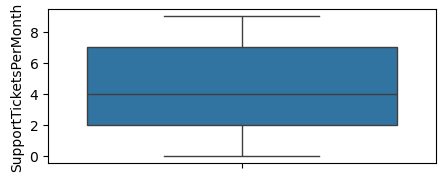

In [182]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['SupportTicketsPerMonth']);

No outliers in 'SupportTicketsPerMonth'.

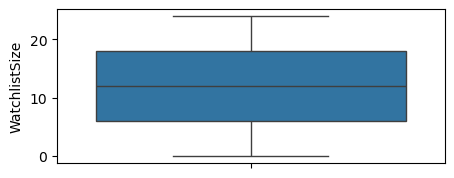

In [184]:
plt.figure(figsize=(5,2))
sns.boxplot(train_df['WatchlistSize']);

No outliers in 'WatchlistSize'.

# **Feature engineering** #
Let's combine some features to try to get more predictive power.

**ChurnLabel**

In [188]:
# Create new variable 'ChurnLabel' from the 'Churn' variable with encoded values 0 - Not Churned, and 1 - Churned
train_df['ChurnLabel'] = train_df['Churn'].map({0: 'Not Churned', 1: 'Churned'})

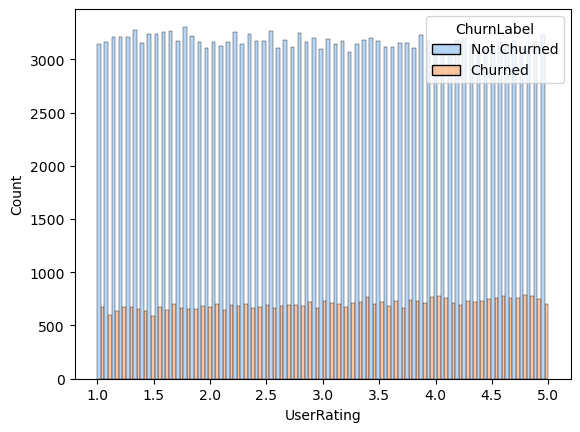

In [284]:
#Plot histplot to examine the user rating of churned and not-churned users.
sns.histplot(data=train_df, x='UserRating', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [189]:
numerical_features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration',
                      'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']


In [190]:
# Check the correlation of the basic numerical features with the churn
import itertools

df_list = []
corr_threshold = 0.1

for feature in numerical_features:
    correlation = np.corrcoef(train_df[f"{feature}"], train_df['Churn'])[0, 1]
    if abs(correlation) >= corr_threshold:
        # Save the result of the correlation in a DataFrame for future comparison
        corr_df = pd.DataFrame({'Feature': f"{feature}", 'Correlation': correlation}, index=[0])
        df_list.append(corr_df)

# Create combined features and check their correlation with the churn
for feature1, feature2 in itertools.combinations(numerical_features, 2):

    # Check how this new feature is correlated with the churn
    correlation = np.corrcoef(train_df[feature1]*train_df[feature2], train_df['Churn'])[0, 1]
    if abs(correlation) >= corr_threshold:
        # Create interaction term
        train_df[f"{feature1}{feature2}"] = train_df[feature1] * train_df[feature2]
        test_df[f"{feature1}{feature2}"] = test_df[feature1] * test_df[feature2]

        # Save the result of the correlation in a DataFrame for future comparison
        corr_df = pd.DataFrame({'Feature': f"{feature1}{feature2}", 'Correlation': correlation}, index=[0])
        df_list.append(corr_df)

    # Create ratio-based features, handling division by zero
    
    # Check how this new feature is correlated with the churn
    correlation = np.corrcoef(np.where(train_df[feature2]==0, 0, train_df[feature1]/train_df[feature2]), train_df['Churn'])[0, 1]
    
    if abs(correlation) >= corr_threshold:
        train_df[f"{feature1}_Per_{feature2}"] = np.where(train_df[feature2] == 0, 0, train_df[feature1] / train_df[feature2])
        test_df[f"{feature1}_Per_{feature2}"] = np.where(test_df[feature2] == 0, 0, test_df[feature1] / test_df[feature2])

        # Save the result of the correlation in a DataFrame for future comparison
        corr_df = pd.DataFrame({'Feature': f"{feature1}_Per_{feature2}", 'Correlation': correlation}, index=[0])
    
        df_list.append(corr_df)

    # Check how this new feature is correlated with the churn
    correlation = np.corrcoef(np.where(train_df[feature1]==0, 0, train_df[feature2]/train_df[feature1]), train_df['Churn'])[0, 1]
                              
    if abs(correlation) >= corr_threshold:
        train_df[f"{feature2}_Per_{feature1}"] = np.where(train_df[feature1] == 0, 0, train_df[feature2] / train_df[feature1])
        test_df[f"{feature2}_Per_{feature1}"] = np.where(test_df[feature1] == 0, 0, test_df[feature2] / test_df[feature1])
        
        # Save the result of the correlation in a DataFrame for future comparison
        corr_df = pd.DataFrame({'Feature': f"{feature2}_Per_{feature1}", 'Correlation': correlation}, index=[0])
    
        df_list.append(corr_df)

final_corr_df = pd.concat(df_list, ignore_index=True)
final_corr_df_sorted = final_corr_df.reindex(final_corr_df['Correlation'].abs().sort_values(ascending=False).index)

final_corr_df_sorted.to_csv("correlation_churn.csv", index=False)

# Categorical features #

**SubscriptionType**

First, let's check the churn among users with different subscription types.

In [194]:
train_df.groupby('SubscriptionType')['Churn'].value_counts(normalize=True)

SubscriptionType  Churn
Basic             0        0.803479
                  1        0.196521
Premium           0        0.837225
                  1        0.162775
Standard          0        0.815686
                  1        0.184314
Name: proportion, dtype: float64

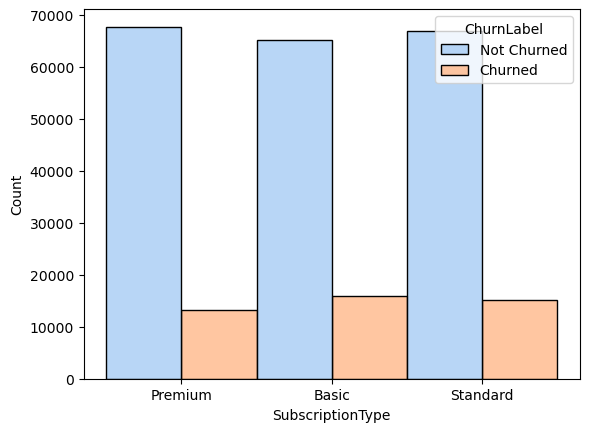

In [195]:
#Plot histplot to examine the subscription type of churned and not-churned users.
sns.histplot(data=train_df, x='SubscriptionType', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**PaymentMethod**

First, let's check the churn among users with different payment methods.

In [198]:
train_df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True)

PaymentMethod    Churn
BankTransfer     0        0.820731
                 1        0.179269
CreditCard       0        0.837749
                 1        0.162251
ElectronicCheck  0        0.807529
                 1        0.192471
MailedCheck      0        0.809112
                 1        0.190888
Name: proportion, dtype: float64

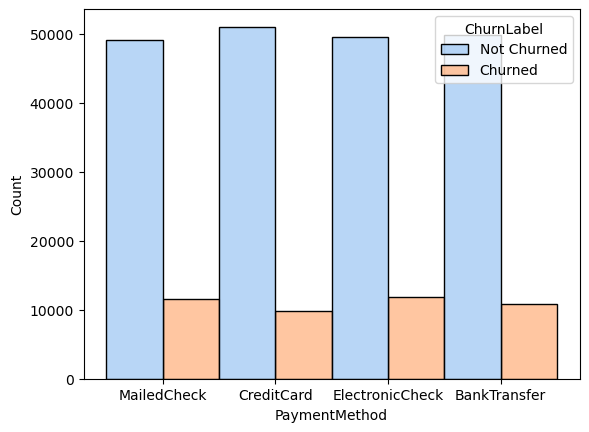

In [199]:
#Plot histplot to examine the subscription type of churned and not-churned users.
sns.histplot(data=train_df, x='PaymentMethod', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**PaperlessBilling**

First, let's check the churn among users with paper and paperless billing.

In [202]:
train_df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True)

PaperlessBilling  Churn
No                0        0.818413
                  1        0.181587
Yes               0        0.819124
                  1        0.180876
Name: proportion, dtype: float64

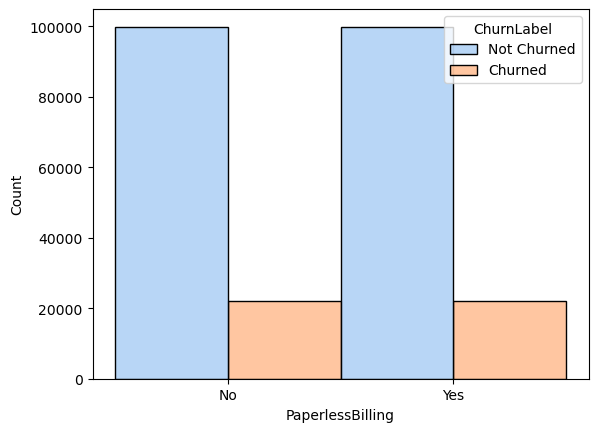

In [203]:
#Plot histplot to examine the subscription type of churned and not-churned users.
sns.histplot(data=train_df, x='PaperlessBilling', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**ContentType**

First, let's check the churn among users with different preffered content types.

In [206]:
train_df.groupby('ContentType')['Churn'].value_counts(normalize=True)

ContentType  Churn
Both         0        0.811530
             1        0.188470
Movies       0        0.822236
             1        0.177764
TVShows      0        0.822602
             1        0.177398
Name: proportion, dtype: float64

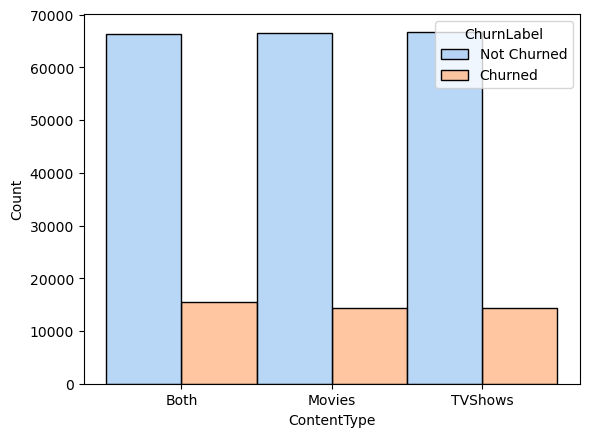

In [207]:
#Plot histplot to examine the subscription type of churned and not-churned users.
sns.histplot(data=train_df, x='ContentType', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**MultiDeviceAccess**

First, let's check the churn among users with different access devices.

In [210]:
train_df.groupby('MultiDeviceAccess')['Churn'].value_counts(normalize=True)

MultiDeviceAccess  Churn
No                 0        0.818273
                   1        0.181727
Yes                0        0.819264
                   1        0.180736
Name: proportion, dtype: float64

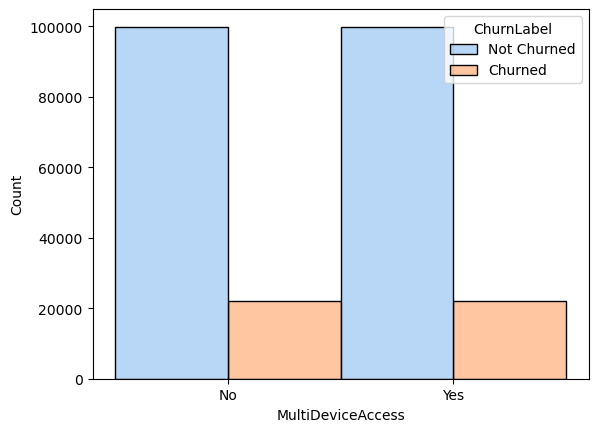

In [211]:
#Plot histplot to examine the subscription type of churned and not-churned users.
sns.histplot(data=train_df, x='MultiDeviceAccess', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**DeviceRegistered**

In [213]:
train_df.groupby('DeviceRegistered')['Churn'].value_counts(normalize=True)

DeviceRegistered  Churn
Computer          0        0.818650
                  1        0.181350
Mobile            0        0.817628
                  1        0.182372
TV                0        0.820956
                  1        0.179044
Tablet            0        0.817853
                  1        0.182147
Name: proportion, dtype: float64

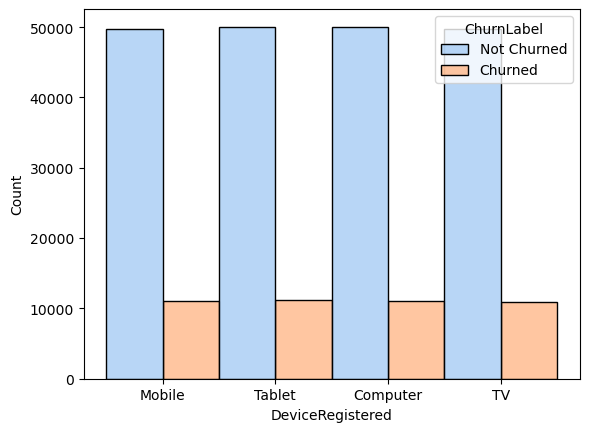

In [214]:
#Plot histplot to examine the subscription type of churned and not-churned users.
sns.histplot(data=train_df, x='DeviceRegistered', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**GenrePreference**

In [216]:
train_df.groupby('GenrePreference')['Churn'].value_counts(normalize=True)

GenrePreference  Churn
Action           0        0.834134
                 1        0.165866
Comedy           0        0.806584
                 1        0.193416
Drama            0        0.821291
                 1        0.178709
Fantasy          0        0.823266
                 1        0.176734
Sci-Fi           0        0.808556
                 1        0.191444
Name: proportion, dtype: float64

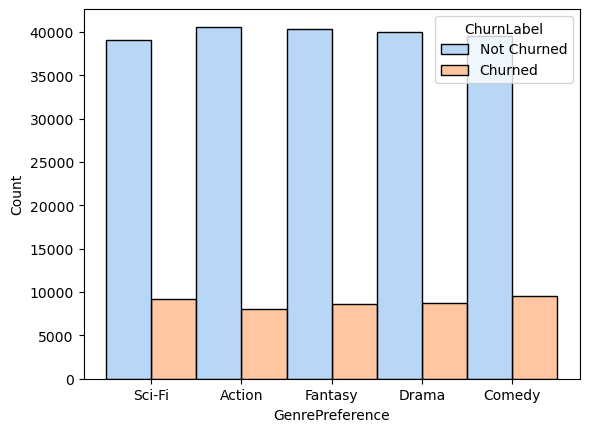

In [217]:
#Plot histplot to examine the subscription type of churned and not-churned users.
sns.histplot(data=train_df, x='GenrePreference', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**Gender**

In [219]:
train_df.groupby('Gender')['Churn'].value_counts(normalize=True)

Gender  Churn
Female  0        0.821644
        1        0.178356
Male    0        0.815891
        1        0.184109
Name: proportion, dtype: float64

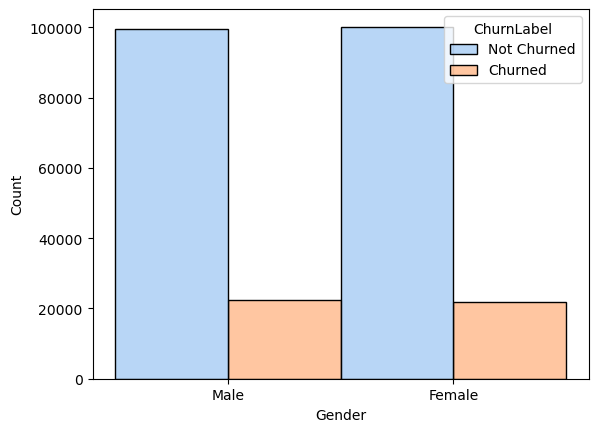

In [220]:
#Plot histplot to examine the subscription type of churned and not-churned users.
sns.histplot(data=train_df, x='Gender', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**ParentalControl**

In [222]:
train_df.groupby('ParentalControl')['Churn'].value_counts(normalize=True)

ParentalControl  Churn
No               0        0.816634
                 1        0.183366
Yes              0        0.820895
                 1        0.179105
Name: proportion, dtype: float64

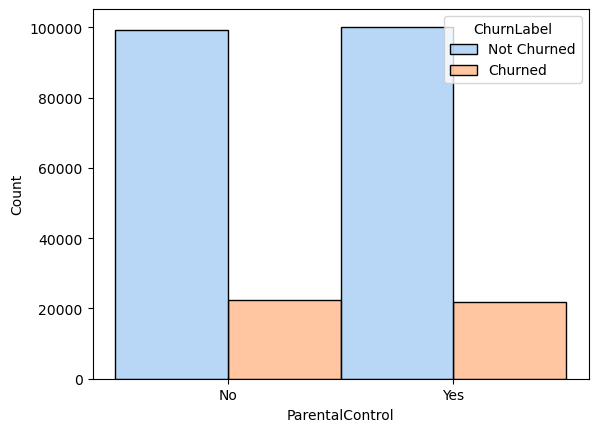

In [223]:
#Plot histplot to examine the subscription type of churned and not-churned users.
sns.histplot(data=train_df, x='ParentalControl', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**SubtitlesEnabled**

In [225]:
train_df.groupby('SubtitlesEnabled')['Churn'].value_counts(normalize=True)

SubtitlesEnabled  Churn
No                0        0.813991
                  1        0.186009
Yes               0        0.823523
                  1        0.176477
Name: proportion, dtype: float64

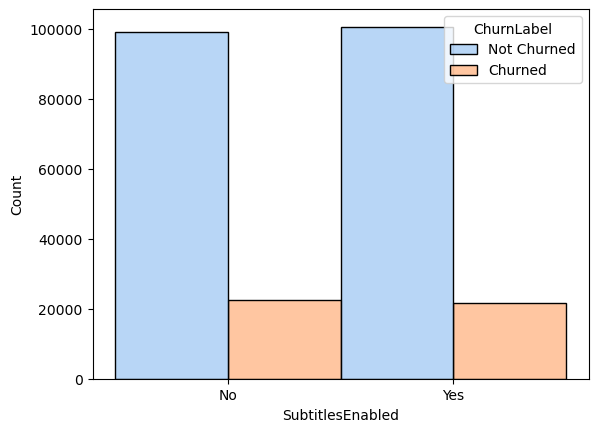

In [226]:
#Plot histplot to examine the subscription type of churned and not-churned users.
sns.histplot(data=train_df, x='SubtitlesEnabled', hue='ChurnLabel', hue_order=['Not Churned', 'Churned'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

# **Correlation among features** #

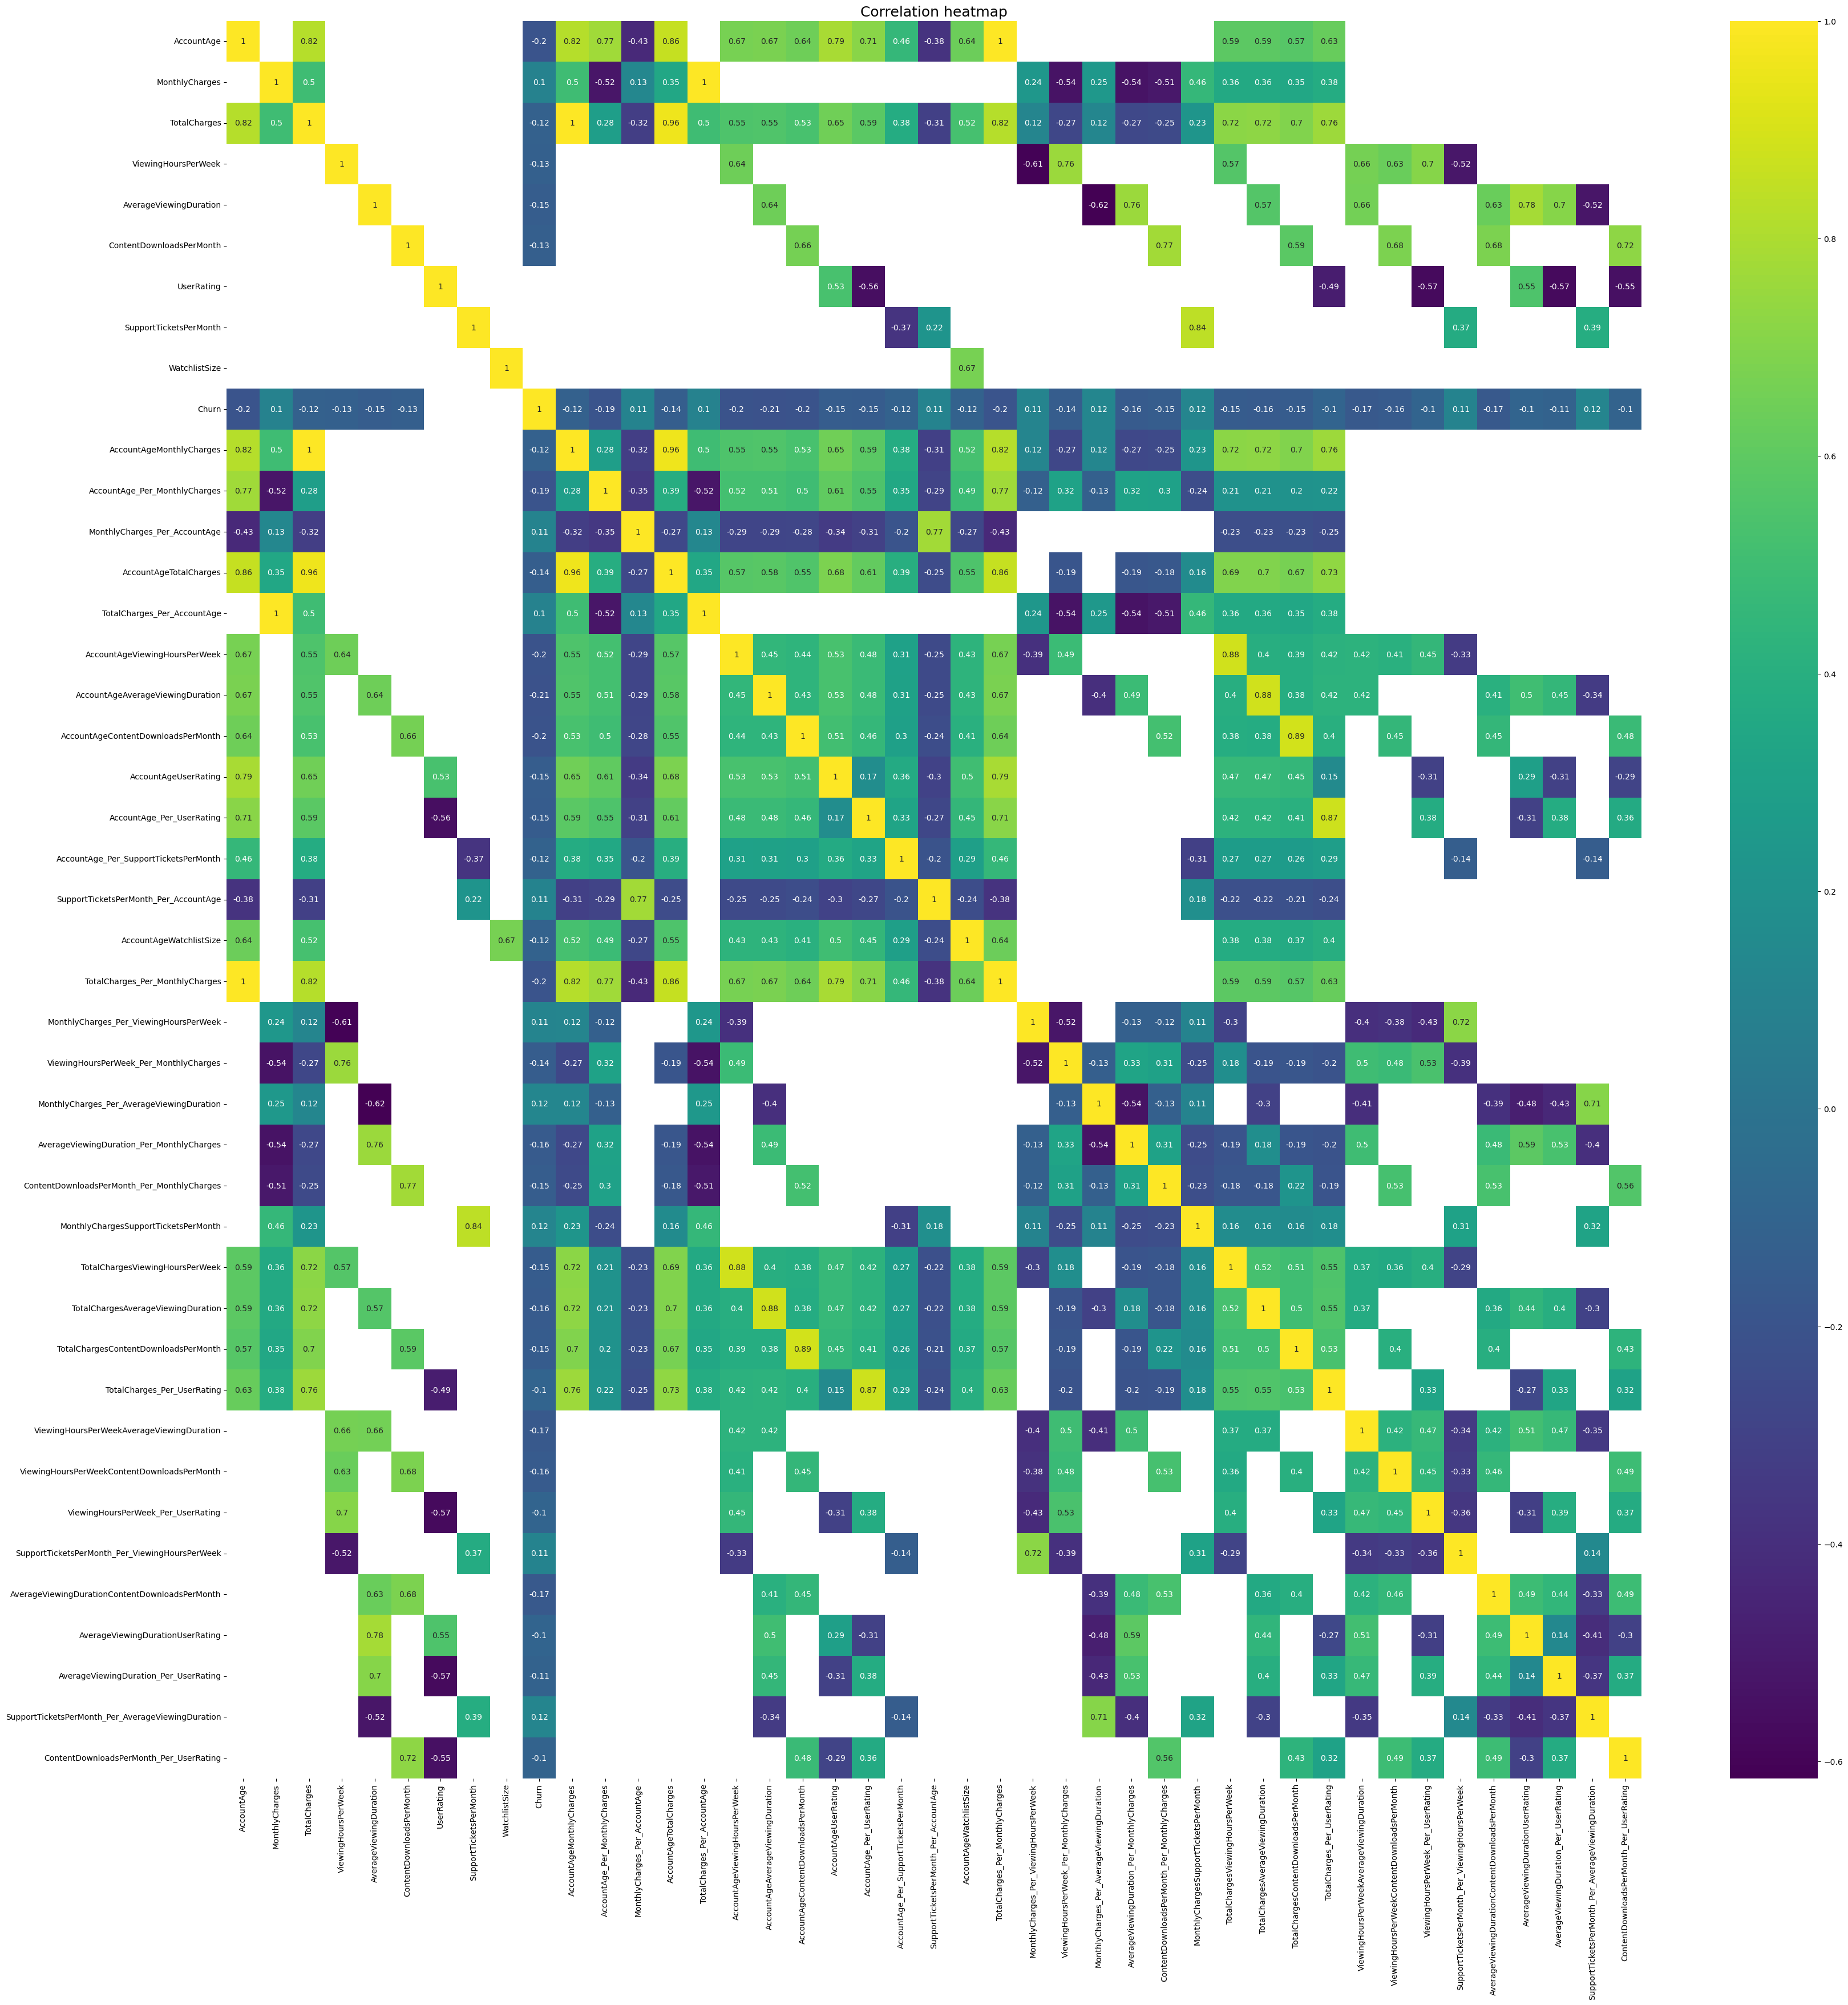

In [272]:
# Show the correlations between potential features
corr_matrix = train_df.corr(method='pearson', numeric_only=True)
filtered_corr_matrix = corr_matrix[abs(corr_matrix) >= 0.1]

plt.figure(figsize=(40,40))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation heatmap', fontsize=18)
plt.show();

In [278]:
# Extract the features correlated with churn
threshold = 0.0
corr_pairs = corr_matrix.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter the pairs based on the threshold
churn_pairs = corr_pairs[
    (corr_pairs['Feature 2'] == 'Churn') &
    (corr_pairs['Feature 1'] != corr_pairs['Feature 2']) &
    (abs(corr_pairs['Correlation']) >= threshold)
]

churn_pairs = churn_pairs.sort_values(by='Correlation', key=abs, ascending=False)

print(churn_pairs)

                                              Feature 1 Feature 2  Correlation
697                    AccountAgeAverageViewingDuration     Churn    -0.211278
654                       AccountAgeViewingHoursPerWeek     Churn    -0.201495
740                  AccountAgeContentDownloadsPerMonth     Churn    -0.199352
9                                            AccountAge     Churn    -0.197736
998                     TotalCharges_Per_MonthlyCharges     Churn    -0.197736
482                       AccountAge_Per_MonthlyCharges     Churn    -0.194331
1471          ViewingHoursPerWeekAverageViewingDuration     Churn    -0.172806
1643     AverageViewingDurationContentDownloadsPerMonth     Churn    -0.171814
1342                 TotalChargesAverageViewingDuration     Churn    -0.160681
1514        ViewingHoursPerWeekContentDownloadsPerMonth     Churn    -0.160450
1170          AverageViewingDuration_Per_MonthlyCharges     Churn    -0.157554
1299                    TotalChargesViewingHoursPerW

In [282]:
# Export the entire table in CSV file
churn_pairs.to_csv('churn_correlations.csv', index=False)
print("Table exported to 'churn_correlations.csv'")

Table exported to 'churn_correlations.csv'


In [292]:
#drop AccountAge*UserRating and AverageViewingDuration*UserRating interactive features
train_df = train_df.drop(columns=['AccountAgeUserRating', 'AverageViewingDurationUserRating'])
test_df = test_df.drop(columns=['AccountAgeUserRating', 'AverageViewingDurationUserRating'])

In [294]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 53 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   AccountAge                                         243787 non-null  int64  
 1   MonthlyCharges                                     243787 non-null  float64
 2   TotalCharges                                       243787 non-null  float64
 3   SubscriptionType                                   243787 non-null  object 
 4   PaymentMethod                                      243787 non-null  object 
 5   PaperlessBilling                                   243787 non-null  object 
 6   ContentType                                        243787 non-null  object 
 7   MultiDeviceAccess                                  243787 non-null  object 
 8   DeviceRegistered                                   243787 non-null  object

The new combined feature 'TotalCharges_Per_MonthlyCharges' is highly correlated with 'AccountAge' (1.0), 'TotalCharges_Per_AccountAge' is highly correlated with 'MonthlyCharges', 'AccountAgeTotalCharges' is highly correlated with 'TotalCharges (0.96), also 'AccountAgeMonthlyCharges' is highly correlated with 'TotalCharges' (1.0), so I'll drop these features.

In [296]:
# Drop redundant variables after engineering new ones
# Also drop the variables with no predictive power or redundancy
train_df = train_df.drop(columns=['ChurnLabel', 'TotalCharges_Per_MonthlyCharges', 'TotalCharges_Per_AccountAge', 'AccountAgeTotalCharges',
                                  'AccountAgeMonthlyCharges'])

test_df = test_df.drop(columns=['TotalCharges_Per_MonthlyCharges', 'TotalCharges_Per_AccountAge', 'AccountAgeTotalCharges',
                                  'AccountAgeMonthlyCharges'])

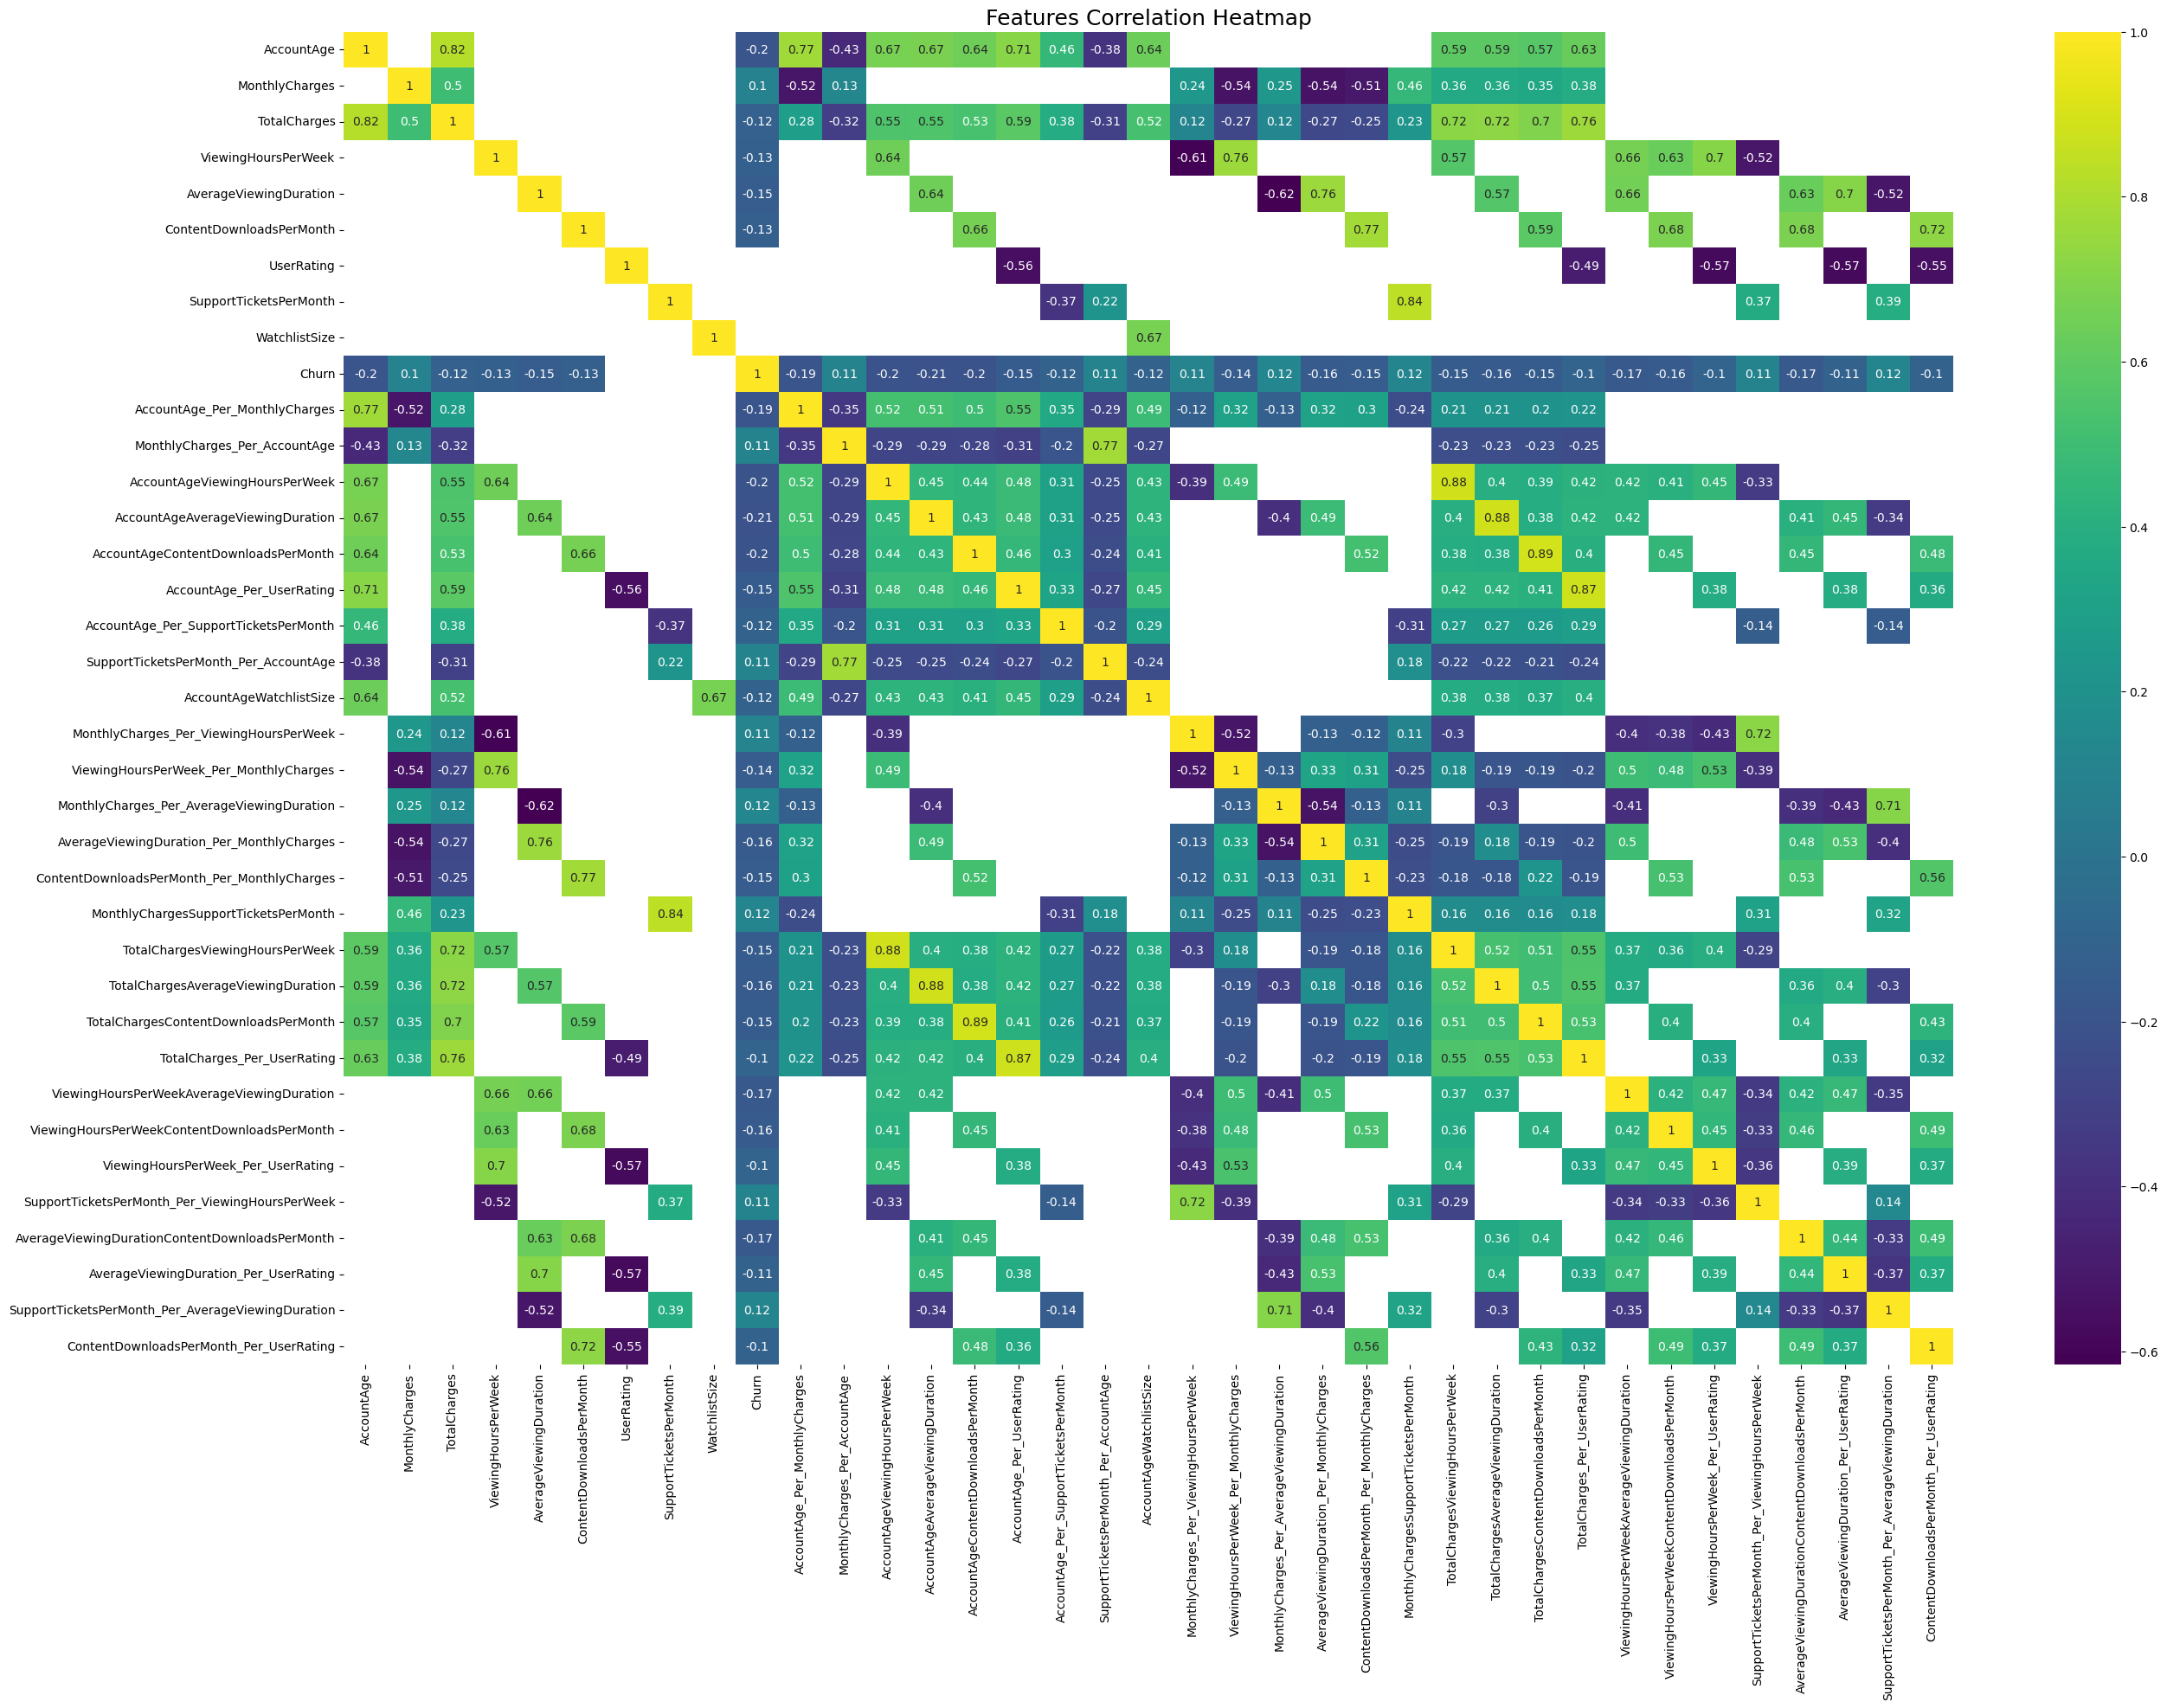

In [298]:
# Show again the correlations between potential features after dropping highly correlated features 
corr_matrix = train_df.corr(method='pearson', numeric_only=True)
filtered_corr_matrix = corr_matrix[abs(corr_matrix) >= 0.1]

plt.figure(figsize=(30,20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='viridis')
plt.title('Features Correlation Heatmap', fontsize=18)
plt.show();

In [300]:
# Extract the pairs with correlation above the threshold
threshold = 0.9
corr_pairs = corr_matrix.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter the pairs based on the threshold
filtered_pairs = corr_pairs[
    (abs(corr_pairs['Correlation']) >= threshold) & 
    (corr_pairs['Feature 1'] != corr_pairs['Feature 2'])
]

print(filtered_pairs)

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


In [304]:
# Extract the features correlated to churn
threshold = 0.1
corr_pairs = corr_matrix.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter the pairs based on the threshold
churn_pairs = corr_pairs[
    (corr_pairs['Feature 2'] == 'Churn') &
    (corr_pairs['Feature 1'] != corr_pairs['Feature 2']) &
    (abs(corr_pairs['Correlation']) >= threshold)
]

churn_pairs = churn_pairs.sort_values(by='Correlation', key=abs, ascending=False)

print(churn_pairs)

                                              Feature 1 Feature 2  Correlation
490                    AccountAgeAverageViewingDuration     Churn    -0.211278
453                       AccountAgeViewingHoursPerWeek     Churn    -0.201495
527                  AccountAgeContentDownloadsPerMonth     Churn    -0.199352
9                                            AccountAge     Churn    -0.197736
379                       AccountAge_Per_MonthlyCharges     Churn    -0.194331
1082          ViewingHoursPerWeekAverageViewingDuration     Churn    -0.172806
1230     AverageViewingDurationContentDownloadsPerMonth     Churn    -0.171814
971                  TotalChargesAverageViewingDuration     Churn    -0.160681
1119        ViewingHoursPerWeekContentDownloadsPerMonth     Churn    -0.160450
823           AverageViewingDuration_Per_MonthlyCharges     Churn    -0.157554
934                     TotalChargesViewingHoursPerWeek     Churn    -0.152027
1008               TotalChargesContentDownloadsPerMo

In [306]:
# Export the entire table in CSV file
churn_pairs.to_csv('churn_correlations.csv', index=False)
print("Table exported to 'churn_correlations.csv'")

Table exported to 'churn_correlations.csv'


In [636]:
# Check the class balance of the outcome variable 
print(train_df['Churn'].value_counts(normalize=True))


Churn
0    0.818768
1    0.181232
Name: proportion, dtype: float64


The 'churn' class is imbalanced among the training set - 81.9% not churned, and 18.1% churned users. It is prefered to balance it before modeling.

**Select numerical features for scaling**

In [639]:
# Select only numerical features in 'train_df' for scaling
numerical_features_train = train_df.select_dtypes(include=['float64', 'int64']).columns
numerical_features_train = numerical_features_train.drop('Churn')

print('Check for infinities in training set:', np.isinf(train_df[numerical_features_train]).any().any())  # Check for infinities
print('Check for NaNs in training set:', np.isnan(train_df[numerical_features_train]).any().any())  # Check for NaNs

train_df[numerical_features_train] = train_df[numerical_features_train].replace([np.inf, -np.inf], np.nan)
train_df[numerical_features_train] = train_df[numerical_features_train].fillna(train_df[numerical_features_train].mean())  # Replace inf with NaN

print('Check for infinities in training set after replacing:', np.isinf(train_df[numerical_features_train]).any().any())  # Check for infinities
print('Check for NaNs in training set after replacing:', np.isnan(train_df[numerical_features_train]).any().any())  # Check for NaNs

numerical_features_test = test_df.select_dtypes(include=['float64', 'int64']).columns

print('Check for infinities in test set:', np.isinf(test_df[numerical_features_test]).any().any())  # Check for infinities
print('Check for NaNs in test set:', np.isnan(test_df[numerical_features_test]).any().any())  # Check for NaNs

test_df[numerical_features_test] = test_df[numerical_features_test].replace([np.inf, -np.inf], np.nan)
test_df[numerical_features_test] = test_df[numerical_features_test].fillna(test_df[numerical_features_test].mean())  # Replace inf with NaN

print('Check for infinities in testing set ater replacing:', np.isinf(test_df[numerical_features_test]).any().any())  # Check for infinities
print('Check for NaNs in testing set ater replacing:', np.isnan(test_df[numerical_features_test]).any().any())  # Check for NaNs

Check for infinities in training set: False
Check for NaNs in training set: False
Check for infinities in training set after replacing: False
Check for NaNs in training set after replacing: False
Check for infinities in test set: False
Check for NaNs in test set: False
Check for infinities in testing set ater replacing: False
Check for NaNs in testing set ater replacing: False


# **Scaling** #

In [641]:
# Initialize the scaler
scaler = MinMaxScaler()

train_df_scaled = train_df.copy()
test_df_scaled = test_df.copy()

# Apply scaling to numerical features
train_df_scaled[numerical_features_train] = scaler.fit_transform(train_df[numerical_features_train])

# Select only numerical features in 'test_df' for scaling
test_df_scaled[numerical_features_test] = scaler.fit_transform(test_df[numerical_features_test])

X_train = train_df_scaled.copy()
print("X_train:", X_train.shape)

y_train = train_df_scaled['Churn']
print("y_train:", y_train.shape)

X_test = test_df_scaled.copy()
print("X_test:", X_test.shape)


X_train: (243787, 50)
y_train: (243787,)
X_test: (104480, 49)


# **Assigning the predictors and the target variable** #

In [701]:
for col in X_train.select_dtypes(include=['object']).columns:
    if col != 'CustomerID':
        X_train[col] = X_train[col].astype('category')

for col in X_test.select_dtypes(include=['object']).columns:
    if col != 'CustomerID':
        X_test[col] = X_test[col].astype('category')

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 50 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   AccountAge                                         243787 non-null  float64 
 1   MonthlyCharges                                     243787 non-null  float64 
 2   TotalCharges                                       243787 non-null  float64 
 3   SubscriptionType                                   243787 non-null  category
 4   PaymentMethod                                      243787 non-null  category
 5   PaperlessBilling                                   243787 non-null  category
 6   ContentType                                        243787 non-null  category
 7   MultiDeviceAccess                                  243787 non-null  category
 8   DeviceRegistered                                   243787 non-nu

In [703]:
# Split the train set into training and validation sets in 57/43 ratio
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.43, random_state=42)

print(X_tr['Churn'].value_counts(normalize=True))
print(X_val['Churn'].value_counts(normalize=True))

X_tr = X_tr.drop(columns=['CustomerID', 'Churn'])
X_val = X_val.drop(columns=['CustomerID', 'Churn'])
X_test = X_test.drop(columns=['CustomerID'])

print("X_tr:", X_tr.shape)
print("y_tr:", y_tr.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print()

# Calculate scale_pos_weight
scale_pos_weight = len(y_tr[y_tr == 0]) / len(y_tr[y_tr == 1])
print('scale_pos_weight =', scale_pos_weight)

Churn
0    0.818765
1    0.181235
Name: proportion, dtype: float64
Churn
0    0.818772
1    0.181228
Name: proportion, dtype: float64
X_tr: (138958, 48)
y_tr: (138958,)
X_val: (104829, 48)
y_val: (104829,)
X_test: (104480, 48)

scale_pos_weight = 4.517709656925032


In [705]:
# Calculate scale_pos_weight
scale_pos_weight = len(y_tr[y_tr == 0]) / len(y_tr[y_tr == 1])
print(scale_pos_weight)
scale_pos_weight1 = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(scale_pos_weight1)
scale_pos_weight2 = len(y_val[y_val == 0]) / len(y_val[y_val == 1])
print(scale_pos_weight2)  

4.517709656925032
4.517790050246707
4.5178966206969156


## Make predictions

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

In [ ]:
#Variance ratio
from sklearn.decomposition import PCA

# Assuming X is your data matrix
pca = PCA()
X_tr_pca = pca.fit_transform(X_tr)
X_val_pca = pca.fit_transform(X_val)
X_test_pca = pca.fit_transform(test_df_scaled.drop(columns=['CustomerID']))

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components where cumulative variance >= 1.0
tolerance = 1e-10  # Allow for small floating-point errors
num_components = np.argmax(cumulative_variance >= 1.0 - tolerance) + 1

# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

print(f"Number of components to reach 1.0 cumulative variance: {num_components}")

In [ ]:
# Plot the scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

plt.title('Scree Plot')
plt.show()

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**Dummy Classifier**

In [707]:
dummy_clf = DummyClassifier(strategy="stratified")

# Fit a dummy classifier on the selected feature columns
dummy_clf.fit(X_tr, y_tr)

# Make predictions on the validation data
predicted_probability = dummy_clf.predict_proba(X_val)[:, 1]

# Calculate the ROC AUC Score
roc_auc = roc_auc_score(y_val, predicted_probability)
print(f"ROC AUC Score for Dummy Classifier: {roc_auc:.4f}")


ROC AUC Score for Dummy Classifier: 0.5004


In [709]:
# Save the result of the DummyCLassifier model in a DataFrame for future comparison
dummy_clf_result = pd.DataFrame({'Model': 'DummyClassifier val', 'ROC_AUC Score': roc_auc}, index=[0])
dummy_clf_result

,Model,ROC_AUC Score
0,DummyClassifier val,0.500397


**Random Forest model**

In [ ]:
# Create RFE with the trained model

#from sklearn.feature_selection import RFE

#X_tr_subset, _, y_tr_subset, _ = train_test_split(X_tr, y_tr, test_size=0.6, random_state=42)

#rfe = RFE(estimator=rf, n_features_to_select=25)


In [ ]:
#%timeit rfe.fit(X_tr_subset, y_tr_subset)

In [ ]:
# Transform the data
#X_tr_rfe = rfe.transform(X_tr)
#X_val_rfe = rfe.transform(X_val)
#print(X_tr_rfe)
#print(X_val_rfe)


In [ ]:
# Get the selected feature indices from RFE
#selected_features = rfe.get_support(indices=True)

# Create a DataFrame using the reduced feature set array and the original feature names
#X_tr_rfe_df = pd.DataFrame(X_tr_rfe, columns=X_tr.columns[selected_features])
#X_val_rfe_df = pd.DataFrame(X_val_rfe, columns=X_val.columns[selected_features])

#print(X_tr_rfe_df.info())
#print(X_val_rfe_df.info())

In [ ]:
#rf = RandomForestClassifier(class_weight="balanced_subsample", n_jobs=-1, random_state=42)

#Create a dictionary of hyperparameters to tune
#cv_params = {'max_depth': [8],
#             'max_features': [0.6],
#             'max_samples': [0.6],
#             'min_samples_leaf': [5],
#             'min_samples_split': [4],
#             'n_estimators': [1000],
#             }
#scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Set up StratifiedKFold with 5 splits
#stratified_kfold = StratifiedKFold(n_splits=5)

# Instantiate the GridSearchCV object
#rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=stratified_kfold, refit='roc_auc', verbose=3)

In [ ]:
#from sklearn.utils.class_weight import compute_sample_weight

# Define the target ratio or calculate sample weights based on your needs
#sample_weights = compute_sample_weight(class_weight={0: 0.6, 1: 1.4}, y=y_tr)

In [ ]:
#%timeit rf_cv.fit(X_tr, y_tr)

In [ ]:


# Make predictions on the training data
#y_rf_pred_tr = rf_cv.best_estimator_.predict(X_tr)

# Make predictions on the validation data
#y_pred_probs = rf_cv.best_estimator_.predict_proba(X_val)[:, 1]

# Predict probabilities on the validation set
#y_rf_pred_proba_val = rf_cv.best_estimator_.predict_proba(X_val)[:, 1]  # Predicted probabilities on the validation set

# Get precision-recall curve
#precisions, recalls, thresholds = precision_recall_curve(y_val, y_rf_pred_proba_val)

#f1_scores = np.zeros_like(thresholds)
#for i in range(len(thresholds)):
#    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
#        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
#    else:
#        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

#plt.plot(thresholds, precisions[:-1], label="Precision")
#plt.plot(thresholds, recalls[:-1], label="Recall")
#plt.xlabel("Threshold")
#plt.ylabel("Score")
#plt.title("Precision-Recall Curve vs Threshold")
#plt.legend()
#plt.show()

# Find the threshold that gives the highest F1 score
#best_threshold = thresholds[np.argmax(f1_scores)]

#print(f"Best threshold: {best_threshold}")


In [ ]:
# Adjust threshold
#y_rf_pred_val = (y_rf_pred_proba_val >= best_threshold * 0.97).astype(int)  # use the previosly calculated best threshold

#rf_baseline_auc = roc_auc_score(y_val, y_rf_pred_proba_val)

# Calculate permutation importance on the validation set for Random Forest
#rf_permutation_importance = permutation_importance(rf_cv.best_estimator_, X_val, y_val, scoring='roc_auc', n_repeats=10, random_state=42)

# Store the results in a DataFrame and sort by importance
# Random Forest Permutation Importances
#rf_importances_df = pd.DataFrame({'feature': X_val.columns,
#                                  'importance_mean': rf_permutation_importance.importances_mean
#                                  }).sort_values(by='importance_mean', ascending=False)

# Display the results in a sorted format
#print("\nRandom Forest Permutation Importances (Validation Set):")
#print(rf_importances_df.head(50))

#print()
#print()

#print('Random Forest scoring on the training set:')
#print('Accuracy Score:', accuracy_score(y_tr, y_rf_pred_tr))
#print('Precision Score:', precision_score(y_tr, y_rf_pred_tr))
#print('Recall Score:', recall_score(y_tr, y_rf_pred_tr))
#print('F1 Score:', f1_score(y_tr, y_rf_pred_tr))
#print('ROC AUC Score:', roc_auc_score(y_tr, y_rf_pred_tr))
#print()

# Calculate the scores for the Random Forest model on the validation set
#print('Random Forest scoring on the validation set:')
#print('Accuracy Score:', accuracy_score(y_val, y_rf_pred_val))
#print('Precision Score:', precision_score(y_val, y_rf_pred_val))
#print('Recall Score:', recall_score(y_val, y_rf_pred_val))
#print('F1 Score:', f1_score(y_val, y_rf_pred_val))

#print('ROC AUC Score:', roc_auc_score(y_val, y_rf_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
#precision, recall, thresholds = precision_recall_curve(y_val, y_rf_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
#pr_auc = auc(recall, precision)

# Output the AUC-PR score
#print(f'AUC-PR Score (validation set): {pr_auc}')

In [ ]:
#rf_cv.best_params_

ROC AUC Score for RF model on the validation data is much better than the same score for DummyClassifier on the same data.

In [ ]:
# Save the result of the RF model in a DataFrame for future comparison
#rf_cv_result = pd.DataFrame({'Model': 'RF val', 'ROC_AUC Score': roc_auc_score(y_val, y_rf_pred_proba_val)}, index=[0])

# Join the results from DummyCLassifier and from Random Forest models for comparison
#results = pd.concat([dummy_clf_result, rf_cv_result])
#results

In [ ]:
#rf_importances_df

In [ ]:
# Plot the feature importances as a horizontal bar chart
#plt.figure(figsize=(8, 10))
#for index, value in enumerate(rf_importances_df['importance_mean']):
#    plt.text(value, index, f'{value:.5f}', va='center')  # value is placed at the end of the bar
    
#plt.barh(rf_importances_df['feature'], rf_importances_df['importance_mean'], color='skyblue')

#plt.xlabel('ROC AUC')
#plt.ylabel('Features')
#plt.title('Random Forest Model Feature Importance')
    
#plt.show()

In [ ]:
#Plot Confusion Matrix

# Calculate the confusion matrix
#cm = confusion_matrix(y_val, y_rf_pred_val)

# Create a heatmap visualization
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Random Forest Confusion Matrix')
#plt.show()

In [788]:
class_weights = {0: 1, 1: 3.5}  # 0: majority class, 1: minority class

**LightGBM**

In [714]:
#!pip install lightgbm

In [790]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='auc',
    class_weight = class_weights,
    random_state=42
)

lgbm_params = {
    'learning_rate': [0.005],
    'n_estimators': [1000],
    'max_depth': [5],  # Allow deeper trees
    'num_leaves': [31],  # Increase leaf count for better splits
    'min_child_samples': [50],  # Allow smaller leaf sizes
#    'scale_pos_weight': [4.5],  # Handle class imbalance
    'reg_alpha': [0.1],
    'reg_lambda': [0.1],
    'subsample': [0.9],
    'colsample_bytree': [0.9],
    'min_split_gain': [0.0]  # Reduce gain threshold
}

# Set up StratifiedKFold with 15 splits
stratified_kfold = StratifiedKFold(n_splits=15)

lgbm_cv = GridSearchCV(
    estimator=lgbm,
    param_grid=lgbm_params,
    scoring='roc_auc',
    cv=stratified_kfold,
    verbose=1,
    n_jobs=-1
)


In [ ]:
import time
start_time = time.time()
lgbm_cv.fit(X_tr, y_tr)
end_time = time.time()
print(f"Total training time: {end_time - start_time} seconds")

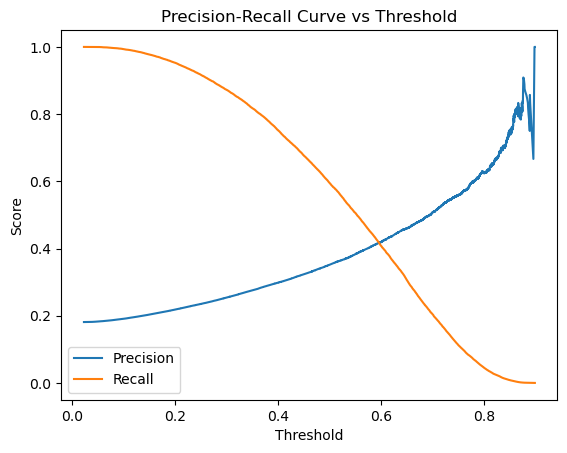

Best threshold: 0.5123292216247557


In [794]:
# Make predictions on the training data
y_pred_tr = lgbm_cv.best_estimator_.predict(X_tr)

# Predict probabilities on the validation set
y_lgbm_pred_proba_val = lgbm_cv.predict_proba(X_val)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_lgbm_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [795]:
# Adjust threshold
y_lgbm_pred_val = (y_lgbm_pred_proba_val >= best_threshold*0.8).astype(int)  # use the previosly calculated best threshold

lgbm_baseline_auc = roc_auc_score(y_val, y_lgbm_pred_proba_val)

#Calculate permutation importance on the validation set for XGBoost
lgbm_permutation_importance = permutation_importance(lgbm_cv.best_estimator_, X_val, y_val, scoring='roc_auc', n_repeats=10, random_state=42)

# Store the results in a DataFrame and sort by importance
# XGBoost Permutation Importances
lgbm_importances_df = pd.DataFrame({'feature': X_val.columns, 'importance_mean': lgbm_permutation_importance.importances_mean}).sort_values(by='importance_mean', ascending=False)

#Display the results in a sorted format
print("\nLightGBM Permutation Importances (Validation Set):")
lgbm_importances_df = lgbm_importances_df.round(6)
print(lgbm_importances_df.head(50))

print()
print()
print(f"Best threshold: {best_threshold}")
print('LightGBM scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

#Calculate the scores for the LightGBM model on the validation set
print('LightGBM scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_lgbm_pred_val))
print('Precision Score:', precision_score(y_val, y_lgbm_pred_val))
print('Recall Score:', recall_score(y_val, y_lgbm_pred_val))
print('F1 Score:', f1_score(y_val, y_lgbm_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_lgbm_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_lgbm_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)
pr_auc = pr_auc.round(7)
# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')


LightGBM Permutation Importances (Validation Set):
                                              feature  importance_mean
22                   AccountAgeAverageViewingDuration         0.022040
40        ViewingHoursPerWeekContentDownloadsPerMonth         0.006348
20                      MonthlyCharges_Per_AccountAge         0.003536
33        ContentDownloadsPerMonth_Per_MonthlyCharges         0.003383
21                      AccountAgeViewingHoursPerWeek         0.003127
23                 AccountAgeContentDownloadsPerMonth         0.003056
43     AverageViewingDurationContentDownloadsPerMonth         0.002987
3                                    SubscriptionType         0.002111
39          ViewingHoursPerWeekAverageViewingDuration         0.001807
4                                       PaymentMethod         0.001561
34               MonthlyChargesSupportTicketsPerMonth         0.001549
29             MonthlyCharges_Per_ViewingHoursPerWeek         0.001162
27              SupportTi

In [798]:
lgbm_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.005,
 'max_depth': 5,
 'min_child_samples': 50,
 'min_split_gain': 0.0,
 'n_estimators': 1000,
 'num_leaves': 31,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 0.9}

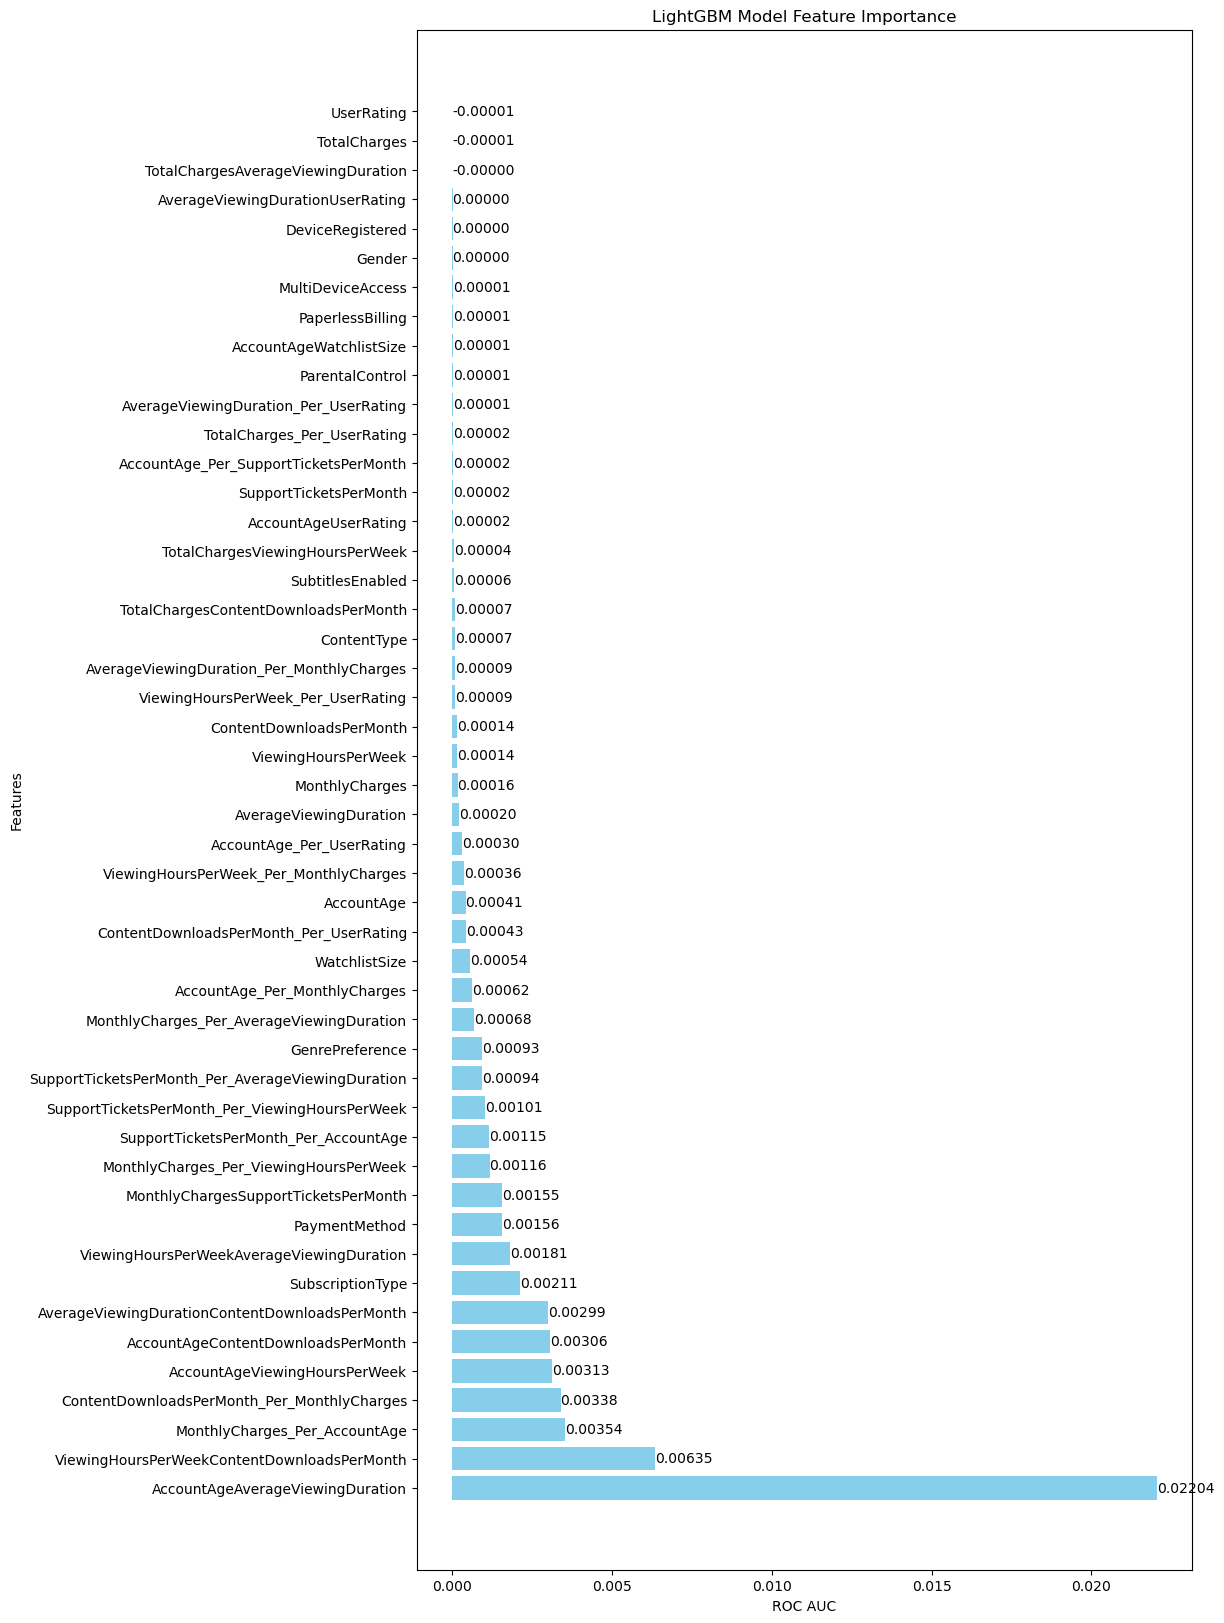

In [800]:
# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 20))
for index, value in enumerate(lgbm_importances_df['importance_mean']):
    plt.text(value, index, f'{value:.5f}', va='center')  # value is placed at the end of the bar
    
plt.barh(lgbm_importances_df['feature'], lgbm_importances_df['importance_mean'], color='skyblue')

plt.xlabel('ROC AUC')
plt.ylabel('Features')
plt.title('LightGBM Model Feature Importance')
    
plt.show()

In [ ]:
# Calculate feature variances
selector = VarianceThreshold()
selector.fit(X_tr)
variances = selector.variances_

# Create a DataFrame for variances
variances_df = pd.DataFrame({
    'feature': X_tr.columns,
    'variance': variances
})

variances_sorted_df = variances_df.sort_values(by='variance', ascending=False)
variances_sorted_df


In [ ]:
lgbm_importances_df.head(50)

In [ ]:
# Merge feature importances with variances
combined_df = pd.merge(lgbm_importances_df, variances_df, on='feature', how='inner')

# Sort by importance or variance (optional)
combined_df = combined_df.sort_values(by='importance_mean', ascending=False)


In [828]:
#from sklearn.feature_selection import VarianceThreshold

# Filter features with low variance and low importance
#low_variance_threshold = 0.01
low_importance_threshold = 0.0001

selected_features = lgbm_importances_df[lgbm_importances_df['importance_mean'] >= low_importance_threshold]['feature'].tolist()

X_tr_selected = X_tr[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

print(X_tr_selected.shape)
print(X_val_selected.shape)
print(X_test_selected.shape)
print(X_tr.shape)

(138958, 27)
(104829, 27)
(104480, 27)
(138958, 48)


In [830]:
import time
start_time = time.time()
lgbm_cv.fit(X_tr_selected, y_tr)
end_time = time.time()
print(f"Total training time: {end_time - start_time} seconds")

Fitting 15 folds for each of 1 candidates, totalling 15 fits
[LightGBM] [Info] Number of positive: 25184, number of negative: 113774
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5563
[LightGBM] [Info] Number of data points in the train set: 138958, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.436534 -> initscore=-0.255242
[LightGBM] [Info] Start training from score -0.255242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

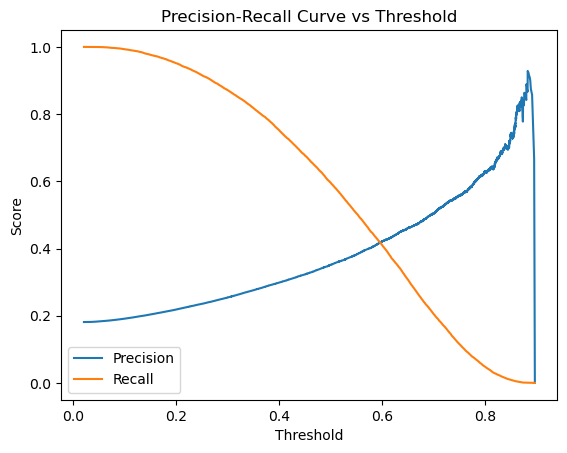

Best threshold: 0.4997235662129031


In [832]:
# Make predictions on the training data
y_pred_tr = lgbm_cv.best_estimator_.predict(X_tr_selected)
#y_pred_tr = lgbm_cv.best_estimator_.predict(X_tr)

# Predict probabilities on the validation set
y_lgbm_pred_proba_val = lgbm_cv.predict_proba(X_val_selected)[:, 1]  # Predicted probabilities
#y_lgbm_pred_proba_val = lgbm_cv.predict_proba(X_val)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_lgbm_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [834]:
# Adjust threshold
y_lgbm_pred_val = (y_lgbm_pred_proba_val >= best_threshold*0.8).astype(int)  # use the previosly calculated best threshold


In [838]:
print(f"Best threshold: {best_threshold}")
print('LightGBM scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

#Calculate the scores for the LightGBM model on the validation set
print('LightGBM scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_lgbm_pred_val))
print('Precision Score:', precision_score(y_val, y_lgbm_pred_val))
print('Recall Score:', recall_score(y_val, y_lgbm_pred_val))
print('F1 Score:', f1_score(y_val, y_lgbm_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_lgbm_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_lgbm_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)

# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')

Best threshold: 0.4997235662129031
LightGBM scoring on the training set:
Accuracy Score: 0.7341282977590351
Precision Score: 0.361794636771722
Recall Score: 0.6112611181702668
F1 Score: 0.4545494810505957
ROC AUC Score: 0.6862931006148326

LightGBM scoring on the validation set:
Accuracy Score: 0.6351677493823275
Precision Score: 0.29880203215487866
Recall Score: 0.7522897147068113
F1 Score: 0.42771850543925544
ROC AUC Score: 0.7475355631230263
AUC-PR Score (validation set): 0.39869594505323275


In [780]:
lgbm_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.005,
 'max_depth': 5,
 'min_child_samples': 50,
 'min_split_gain': 0.0,
 'n_estimators': 1000,
 'num_leaves': 31,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'scale_pos_weight': 4.5,
 'subsample': 0.9}

In [840]:
# Save the result of the LightGBM model in a DataFrame for future comparison
lgbm_cv_result = pd.DataFrame({'Model': 'LightGBM val', 'ROC_AUC Score': roc_auc_score(y_val, y_lgbm_pred_proba_val)}, index=[0])


In [842]:
# Add the result to the results from the other models for comparison
results = pd.concat([dummy_clf_result, lgbm_cv_result])
results

,Model,ROC_AUC Score
0,DummyClassifier val,0.500397
0,LightGBM val,0.747536


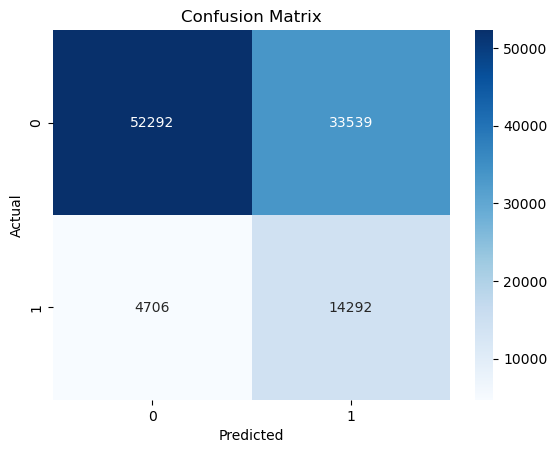

In [844]:
#Plot Confusion Matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_lgbm_pred_val)

# Create a heatmap visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [850]:
# Use LightGBM model to predict on test data

y_pred = lgbm_cv.predict(X_test_selected)  # For classification
#y_pred = lgbm_cv.predict(X_test)  # For classification

y_pred_proba = lgbm_cv.predict_proba(X_test_selected)[:, 1]  # For probabilities
#y_pred_proba = lgbm_cv.predict_proba(X_test)[:, 1]  # For probabilities

print(y_pred_proba)

# Combine predictions with label column into a dataframe
lgbm_prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': y_pred_proba})

# Ensure 'prediction_df' contains 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(lgbm_prediction_df.shape)
print(lgbm_prediction_df.head())

prediction_df = lgbm_prediction_df

[0.30537964 0.14375526 0.69988621 ... 0.29111301 0.48410794 0.06165813]
(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.305380
1  LFR4X92X8H               0.143755
2  QM5GBIYODA               0.699886
3  D9RXTK2K9F               0.147053
4  ENTCCHR1LR               0.377939


In [851]:
# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
print(prediction_df.head(10))


(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.305380
1  LFR4X92X8H               0.143755
2  QM5GBIYODA               0.699886
3  D9RXTK2K9F               0.147053
4  ENTCCHR1LR               0.377939
5  7A88BB5IO6               0.709091
6  70OMW9XEWR               0.311325
7  EL1RMFMPYL               0.546670
8  4IA2QPT6ZK               0.457138
9  AEDCWHSJDN               0.418876


In [854]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
prediction_df.to_csv("lgbm11_prediction_submission.csv", index=False)
submission = pd.read_csv("lgbm11_prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [856]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [858]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [860]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

**CatBoost**

In [ ]:
#pip install catboost

In [922]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138958 entries, 13970 to 21414
Data columns (total 48 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   AccountAge                                         138958 non-null  float64 
 1   MonthlyCharges                                     138958 non-null  float64 
 2   TotalCharges                                       138958 non-null  float64 
 3   SubscriptionType                                   138958 non-null  category
 4   PaymentMethod                                      138958 non-null  category
 5   PaperlessBilling                                   138958 non-null  category
 6   ContentType                                        138958 non-null  category
 7   MultiDeviceAccess                                  138958 non-null  category
 8   DeviceRegistered                                   138958 non-null

In [1015]:
from catboost import CatBoostClassifier

catboost_params = {
    'iterations': [2000],          # Number of boosting iterations
    'learning_rate': [0.003],       # Learning rate
    'depth': [7],                  # Maximum depth of the tree
    'l2_leaf_reg': [10],            # L2 regularization term on weights
    'bagging_temperature': [0.5],
    'border_count': [64]
}

categorical_features = ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
                        'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']

catboost = CatBoostClassifier(cat_features = categorical_features, loss_function='Logloss', class_weights=class_weights, random_state=42)

# Set up StratifiedKFold with 5 splits
stratified_kfold = StratifiedKFold(n_splits=5)

catboost_cv = GridSearchCV(estimator=catboost, param_grid=catboost_params, scoring='roc_auc', cv=stratified_kfold, verbose=1, n_jobs=-1)


In [890]:
print(catboost_params)

{'iterations': [2000], 'learning_rate': [0.003], 'depth': [7], 'l2_leaf_reg': [10], 'bagging_temperature': [0.5], 'border_count': [64]}


In [ ]:
import time
start_time = time.time()
catboost_cv.fit(X_tr, y_tr)
end_time = time.time()
print(f"Total training time: {end_time - start_time} seconds")

In [914]:
# Display the best parameters and best score
print(f"Best Parameters: {catboost_cv.best_params_}")
print(f"Best ROC AUC Score: {catboost_cv.best_score_:.8f}")

Best Parameters: {'bagging_temperature': 0.5, 'border_count': 64, 'depth': 7, 'iterations': 2000, 'l2_leaf_reg': 10, 'learning_rate': 0.003}
Best ROC AUC Score: 0.74617187


In [916]:
# Predict probabilities and calculate roc_auc score
y_pred_proba = catboost_cv.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f"Validation ROC AUC Score: {roc_auc:.9f}")

# Optional: Classification report at a specific threshold
threshold = 0.5
y_pred = (y_pred_proba > threshold).astype(int)
print(classification_report(y_val, y_pred))

Validation ROC AUC Score: 0.748010922
              precision    recall  f1-score   support

           0       0.89      0.76      0.82     85831
           1       0.35      0.59      0.44     18998

    accuracy                           0.73    104829
   macro avg       0.62      0.68      0.63    104829
weighted avg       0.80      0.73      0.75    104829



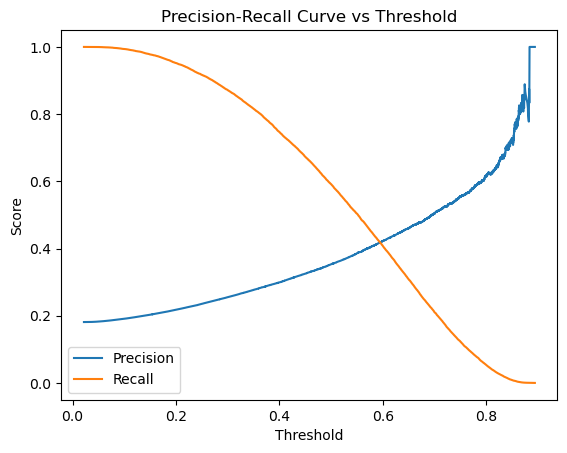

Best threshold: 0.503416165947086


In [918]:
# Make predictions on the training data
y_pred_tr = catboost_cv.best_estimator_.predict(X_tr)

# Predict probabilities on the validation set
y_catboost_pred_proba_val = catboost_cv.predict_proba(X_val)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_catboost_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [920]:
# Adjust threshold
y_catboost_pred_val = (y_catboost_pred_proba_val >= best_threshold*0.8).astype(int)  # use the previosly calculated best threshold

catboost_baseline_auc = roc_auc_score(y_val, y_catboost_pred_proba_val)

#Calculate permutation importance on the validation set for CatBoost
catboost_permutation_importance = permutation_importance(catboost_cv.best_estimator_, X_val, y_val, scoring='roc_auc', n_repeats=10, random_state=42)

# Store the results in a DataFrame and sort by importance
# CatBoost Permutation Importances
catboost_importances_df = pd.DataFrame({'feature': X_val.columns, 'importance_mean': catboost_permutation_importance.importances_mean}).sort_values(by='importance_mean', ascending=False)

#Display the results in a sorted format
print("\nCatBoost Permutation Importances (Validation Set):")
catboost_importances_df = catboost_importances_df.round(6)
print(catboost_importances_df.head(50))

print()
print()
print(f"Best threshold: {best_threshold}")
print('CatBoost scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

#Calculate the scores for the CatBoost model on the validation set
print('CatBoost scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_catboost_pred_val))
print('Precision Score:', precision_score(y_val, y_catboost_pred_val))
print('Recall Score:', recall_score(y_val, y_catboost_pred_val))
print('F1 Score:', f1_score(y_val, y_catboost_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_catboost_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_catboost_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)
pr_auc = pr_auc.round(7)
# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')


CatBoost Permutation Importances (Validation Set):
                                              feature  importance_mean
22                   AccountAgeAverageViewingDuration         0.006719
33        ContentDownloadsPerMonth_Per_MonthlyCharges         0.003417
40        ViewingHoursPerWeekContentDownloadsPerMonth         0.003254
23                 AccountAgeContentDownloadsPerMonth         0.002613
43     AverageViewingDurationContentDownloadsPerMonth         0.002227
20                      MonthlyCharges_Per_AccountAge         0.002101
19                      AccountAge_Per_MonthlyCharges         0.002059
0                                          AccountAge         0.001969
27              SupportTicketsPerMonth_Per_AccountAge         0.001697
3                                    SubscriptionType         0.001528
21                      AccountAgeViewingHoursPerWeek         0.001472
39          ViewingHoursPerWeekAverageViewingDuration         0.001210
46  SupportTicketsPerMont

In [924]:
catboost_cv.best_params_

{'bagging_temperature': 0.5,
 'border_count': 64,
 'depth': 7,
 'iterations': 2000,
 'l2_leaf_reg': 10,
 'learning_rate': 0.003}

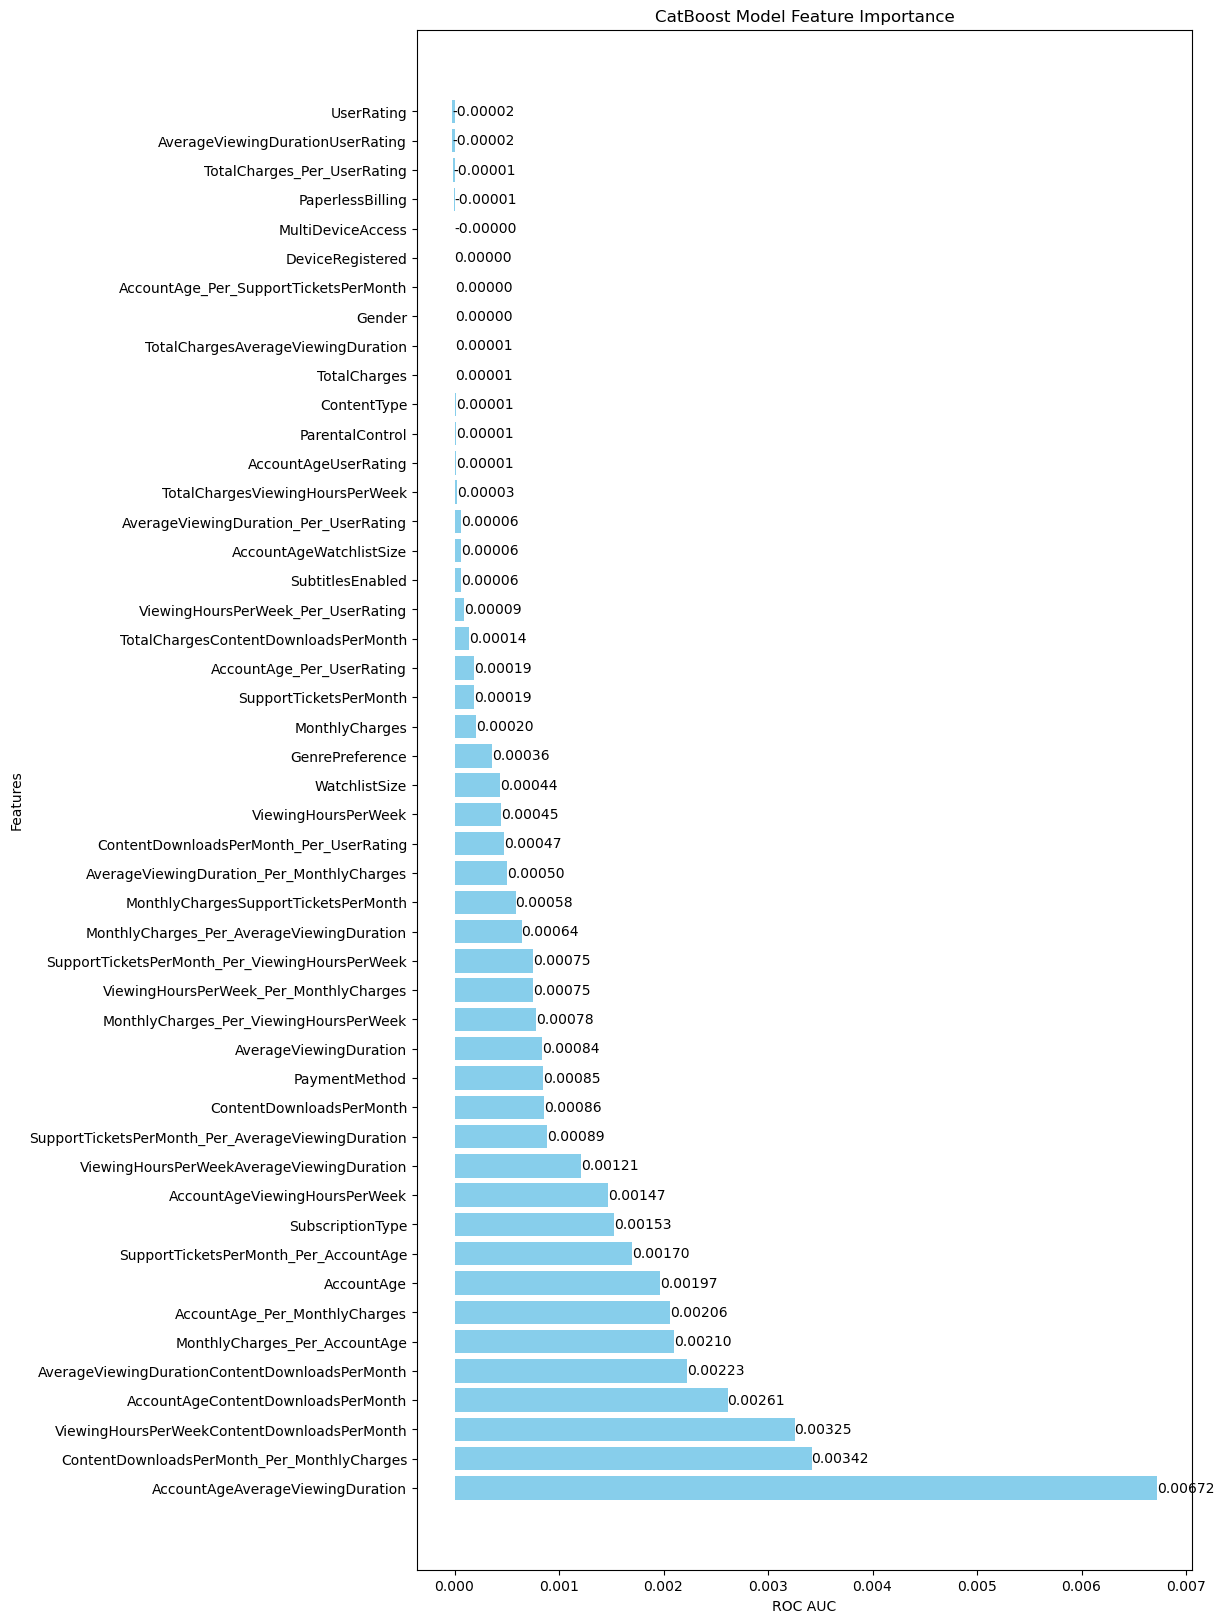

In [972]:
# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 20))
for index, value in enumerate(catboost_importances_df['importance_mean']):
    plt.text(value, index, f'{value:.5f}', va='center')  # value is placed at the end of the bar
    
plt.barh(catboost_importances_df['feature'], catboost_importances_df['importance_mean'], color='skyblue')

plt.xlabel('ROC AUC')
plt.ylabel('Features')
plt.title('CatBoost Model Feature Importance')
    
plt.show()

In [ ]:
# Calculate feature variances
selector = VarianceThreshold()
selector.fit(X_tr)
variances = selector.variances_

# Create a DataFrame for variances
variances_df = pd.DataFrame({
    'feature': X_tr.columns,
    'variance': variances
})

variances_sorted_df = variances_df.sort_values(by='variance', ascending=False)
variances_sorted_df


In [ ]:
# Merge feature importances with variances
combined_df = pd.merge(catboost_importances_df, variances_df, on='feature', how='inner')

# Sort by importance or variance (optional)
combined_df = combined_df.sort_values(by='importance_mean', ascending=False)


In [1019]:
# Filter features with low variance and low importance
#low_variance_threshold = 0.005
low_importance_threshold = 0.0001

# Filter features based on the threshold
selected_features = catboost_importances_df[catboost_importances_df['importance_mean'] >= low_importance_threshold]['feature'].tolist()
print(selected_features)
print()
# Using set intersection
cat_features_selected = set(categorical_features).intersection(set(selected_features))
print(cat_features_selected)

# Convert the set back to a list
cat_features_selected_list = list(cat_features_selected)

# Create new DataFrames with selected features
X_tr_selected = X_tr[selected_features]
X_test_selected = X_test[selected_features]
X_val_selected = X_val[selected_features]


['AccountAgeAverageViewingDuration', 'ContentDownloadsPerMonth_Per_MonthlyCharges', 'ViewingHoursPerWeekContentDownloadsPerMonth', 'AccountAgeContentDownloadsPerMonth', 'AverageViewingDurationContentDownloadsPerMonth', 'MonthlyCharges_Per_AccountAge', 'AccountAge_Per_MonthlyCharges', 'AccountAge', 'SupportTicketsPerMonth_Per_AccountAge', 'SubscriptionType', 'AccountAgeViewingHoursPerWeek', 'ViewingHoursPerWeekAverageViewingDuration', 'SupportTicketsPerMonth_Per_AverageViewingDuration', 'ContentDownloadsPerMonth', 'PaymentMethod', 'AverageViewingDuration', 'MonthlyCharges_Per_ViewingHoursPerWeek', 'ViewingHoursPerWeek_Per_MonthlyCharges', 'SupportTicketsPerMonth_Per_ViewingHoursPerWeek', 'MonthlyCharges_Per_AverageViewingDuration', 'MonthlyChargesSupportTicketsPerMonth', 'AverageViewingDuration_Per_MonthlyCharges', 'ContentDownloadsPerMonth_Per_UserRating', 'ViewingHoursPerWeek', 'WatchlistSize', 'GenrePreference', 'MonthlyCharges', 'SupportTicketsPerMonth', 'AccountAge_Per_UserRating',

In [1021]:
print(len(selected_features))

30


In [1023]:
catboost = CatBoostClassifier(cat_features = cat_features_selected_list, loss_function='Logloss', class_weights=class_weights, random_state=42)

catboost_cv = GridSearchCV(estimator=catboost, param_grid=catboost_params, scoring='roc_auc', cv=stratified_kfold, verbose=1, n_jobs=-1)

In [ ]:
%timeit catboost_cv.fit(X_tr_selected, y_tr)

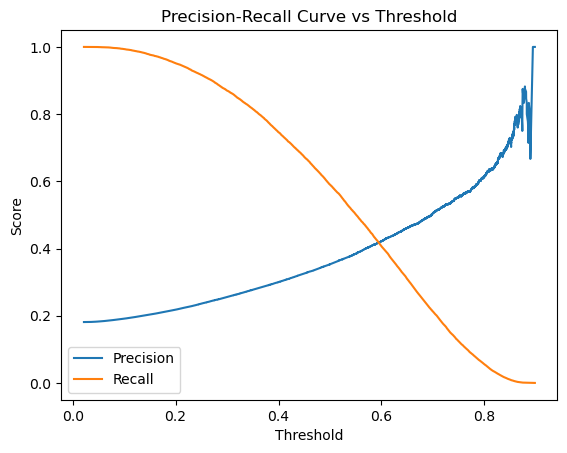

Best threshold: 0.4863266987095049


In [1027]:
# Make predictions on the training data
y_pred_tr = catboost_cv.best_estimator_.predict(X_tr_selected)
#y_pred_tr = catboost_cv.best_estimator_.predict(X_tr)

# Predict probabilities on the validation set
y_catboost_pred_proba_val = catboost_cv.predict_proba(X_val_selected)[:, 1]  # Predicted probabilities
#y_catboost_pred_proba_val = catboost_cv.predict_proba(X_val)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_catboost_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [1029]:
# Adjust threshold
y_catboost_pred_val = (y_catboost_pred_proba_val >= best_threshold*0.80).astype(int)  # use the previosly calculated best threshold


In [1031]:
print(f"Best threshold: {best_threshold}")
print('CatBoost scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

#Calculate the scores for the CatBoost model on the validation set
print('CatBoost scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_catboost_pred_val))
print('Precision Score:', precision_score(y_val, y_catboost_pred_val))
print('Recall Score:', recall_score(y_val, y_catboost_pred_val))
print('F1 Score:', f1_score(y_val, y_catboost_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_catboost_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_catboost_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)

# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')

Best threshold: 0.4863266987095049
CatBoost scoring on the training set:
Accuracy Score: 0.7330272456425683
Precision Score: 0.35785530209029304
Recall Score: 0.5954971410419314
F1 Score: 0.4470577714183509
ROC AUC Score: 0.6794834132794166

CatBoost scoring on the validation set:
Accuracy Score: 0.6265441814764998
Precision Score: 0.29485065054059006
Recall Score: 0.7622381303295084
F1 Score: 0.42521765940890605
ROC AUC Score: 0.7481934654861373
AUC-PR Score (validation set): 0.3992826026501513


In [1033]:
catboost_cv.best_params_

{'bagging_temperature': 0.5,
 'border_count': 64,
 'depth': 7,
 'iterations': 2000,
 'l2_leaf_reg': 10,
 'learning_rate': 0.003}

In [1035]:
# Save the result of the CatBoost model in a DataFrame for future comparison
catboost_cv_result = pd.DataFrame({'Model': 'CatBoost val', 'ROC_AUC Score': roc_auc_score(y_val, y_catboost_pred_proba_val)}, index=[0])


In [1037]:
# Add the result to the results from the other models for comparison
results = pd.concat([dummy_clf_result, lgbm_cv_result, catboost_cv_result])
results

,Model,ROC_AUC Score
0,DummyClassifier val,0.500397
0,LightGBM val,0.747536
0,CatBoost val,0.748193


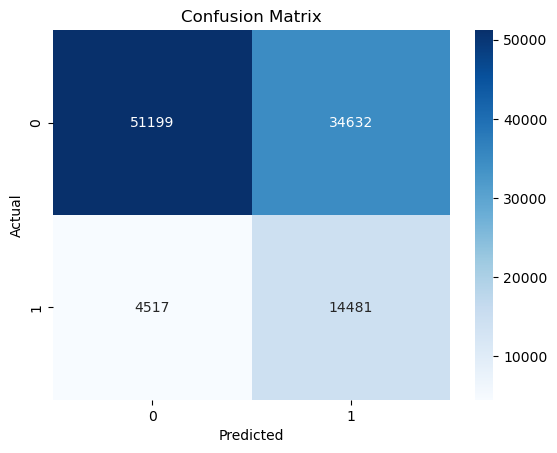

In [1039]:
#Plot Confusion Matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_catboost_pred_val)

# Create a heatmap visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [1041]:
# Use CatBoost model to predict on test data

y_pred = catboost_cv.predict(X_test_selected)  # For classification
#y_pred = catboost_cv.predict(X_test)  # For classification

y_pred_proba = catboost_cv.predict_proba(X_test_selected)[:, 1]  # For probabilities
#y_pred_proba = catboost_cv.predict_proba(X_test)[:, 1]  # For probabilities


print(y_pred_proba)

# Combine predictions with label column into a dataframe
catboost_prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': y_pred_proba})

# Ensure 'prediction_df' contains 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(catboost_prediction_df.shape)
print(catboost_prediction_df.head())

prediction_df = catboost_prediction_df

[0.27192784 0.12516943 0.66741356 ... 0.27525742 0.5238531  0.05321151]
(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.271928
1  LFR4X92X8H               0.125169
2  QM5GBIYODA               0.667414
3  D9RXTK2K9F               0.132096
4  ENTCCHR1LR               0.385391


In [1043]:
# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
print(prediction_df.head(10))


(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.271928
1  LFR4X92X8H               0.125169
2  QM5GBIYODA               0.667414
3  D9RXTK2K9F               0.132096
4  ENTCCHR1LR               0.385391
5  7A88BB5IO6               0.712870
6  70OMW9XEWR               0.304173
7  EL1RMFMPYL               0.572347
8  4IA2QPT6ZK               0.467087
9  AEDCWHSJDN               0.405619


In [1045]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
prediction_df.to_csv("catboost17_prediction_submission.csv", index=False)
submission = pd.read_csv("catboost17_prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [1047]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [1049]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [1051]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

**XGBoost model**

In [ ]:
# Create a dictionary of hyperparameters to tune
cv_params = {
    'learning_rate': [0.01],
    'subsample': [0.5],
    'max_delta_step': [1],
    'max_depth': [4],
    'min_child_weight': [80],
    'n_estimators': [1200],
    'colsample_bytree': [0.85],
    'colsample_bylevel': [0.85],
    'reg_alpha': [0.05],
    'reg_lambda': [0.05],
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Train a new XGBoost model with only the selected features
xgb = XGBClassifier(scale_pos_weight=5, eval_metric='auc',
                    objective='binary:logistic', random_state=42)


# Set up StratifiedKFold with 10 splits
stratified_kfold = StratifiedKFold(n_splits=10)

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=stratified_kfold, refit='roc_auc', verbose=3)


In [ ]:
%timeit xgb_cv.fit(X_tr, y_tr)

In [ ]:
# Make predictions on the training data
y_pred_tr = xgb_cv.best_estimator_.predict(X_tr)

# Predict probabilities on the validation set
y_xgb_pred_proba_val = xgb_cv.predict_proba(X_val)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_xgb_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [ ]:
# Adjust threshold
y_xgb_pred_val = (y_xgb_pred_proba_val >= best_threshold*0.8).astype(int)  # use the previosly calculated best threshold

xgb_baseline_auc = roc_auc_score(y_val, y_xgb_pred_proba_val)

#Calculate permutation importance on the validation set for XGBoost
xgb_permutation_importance = permutation_importance(xgb_cv.best_estimator_, X_val, y_val, scoring='roc_auc', n_repeats=10, random_state=42)

# Store the results in a DataFrame and sort by importance
# XGBoost Permutation Importances
xgb_importances_df = pd.DataFrame({'feature': X_val.columns, 'importance_mean': xgb_permutation_importance.importances_mean}).sort_values(by='importance_mean', ascending=False)

#Display the results in a sorted format
print("\nXGBoost Permutation Importances (Validation Set):")
print(xgb_importances_df.head(50))

print()
print()
print(f"Best threshold: {best_threshold}")
print('XGBoost scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

#Calculate the scores for the XGBoost model on the validation set
print('XGBoost scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_xgb_pred_val))
print('Precision Score:', precision_score(y_val, y_xgb_pred_val))
print('Recall Score:', recall_score(y_val, y_xgb_pred_val))
print('F1 Score:', f1_score(y_val, y_xgb_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_xgb_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_xgb_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)

# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')

In [ ]:
xgb_cv.best_params_

In [ ]:
xgb_importances_df

In [ ]:
# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 20))
for index, value in enumerate(xgb_importances_df['importance_mean']):
    plt.text(value, index, f'{value:.5f}', va='center')  # value is placed at the end of the bar
    
plt.barh(xgb_importances_df['feature'], xgb_importances_df['importance_mean'], color='skyblue')

plt.xlabel('ROC AUC')
plt.ylabel('Features')
plt.title('XGBoost Model Feature Importance')
    
plt.show()

In [ ]:
# Save the result of the XGBoost model in a DataFrame for future comparison
xgb_cv_result = pd.DataFrame({'Model': 'XGB val', 'ROC_AUC Score': roc_auc_score(y_val, y_xgb_pred_proba_val)}, index=[0])


In [ ]:
# Add the result to the results from the other models for comparison
results = pd.concat([dummy_clf_result, xgb_cv_result])
results

In [ ]:
#Plot Confusion Matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_xgb_pred_val)

# Create a heatmap visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Use XGBoost model to predict on test data
test_selected = test_df
y_pred = xgb_cv.predict(test_selected.drop(columns=['CustomerID']))  # For classification

y_pred_proba = xgb_cv.predict_proba(test_selected.drop(columns=['CustomerID']))[:, 1]  # For probabilities
#y_pred_proba = xgb_cv.predict_proba(test_selected)[:, 1]  # For probabilities

print(y_pred_proba)

# Combine predictions with label column into a dataframe
xgb_prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': y_pred_proba})

# Ensure 'prediction_df' contains 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(xgb_prediction_df.shape)
print(xgb_prediction_df.head())

prediction_df = xgb_prediction_df

In [ ]:
# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
print(prediction_df.head(10))


## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
prediction_df.to_csv("xgb4_prediction_submission.csv", index=False)
submission = pd.read_csv("xgb4_prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

**Hist Gradient Boosting**

In [ ]:
# Set sample weights based on class imbalance

# `y_tr` contains the class labels for the training set
sample_weights = compute_sample_weight(class_weight='balanced', y=y_tr)


# Step 1: Train a base model to get permutation importances
base_hgbm = HistGradientBoostingClassifier(random_state=42)

# Create a parameter grid
param_grid = {
    'learning_rate': [0.01],
    'max_features': [0.2],
    'max_leaf_nodes': [15],
    'max_iter': [1200],
    'l2_regularization': [0.5]
}
# Set up StratifiedKFold with 10 splits
stratified_kfold = StratifiedKFold(n_splits=10)

# Initialize GridSearchCV
hgbm_cv = GridSearchCV(base_hgbm, param_grid, cv=stratified_kfold)


In [ ]:
%timeit hgbm_cv.fit(X_tr, y_tr, sample_weight=sample_weights)

In [ ]:
# Access the best model after GridSearchCV
best_model = hgbm_cv.best_estimator_

# You can now access the trained classifier from best_model
print(best_model)

# Step 2: Calculate permutation importance on the validation set
perm_importance = permutation_importance(best_model, X_val, y_val, n_repeats=10, random_state=42)
importances = perm_importance.importances_mean

# Step 3: Set a threshold for selecting important features
threshold = np.percentile(importances, 60)  # Keep features above the 60th percentile

# Step 4: Identify the indices of features that meet the importance threshold
selected_features = np.where(importances >= threshold)[0]


In [ ]:
print(len(selected_features))


In [ ]:
# Select top n features based on importance
top_n = len(selected_features)
feature_indices = importances.argsort()[-top_n:]
X_tr_selected = X_tr.iloc[:, feature_indices]
X_val_selected = X_val.iloc[:, feature_indices]

selected_features = X_tr.columns[feature_indices]
X_test_selected = X_test[selected_features]

print(X_tr_selected.info())
print(X_val_selected.info())
print(X_test_selected.info())


In [ ]:
#X_tr_selected = X_tr
#X_val_selected = X_val


In [ ]:
import time
start_time = time.time()
hgbm_cv.fit(X_tr_selected, y_tr, sample_weight=sample_weights)
end_time = time.time()
print(f"Total training time: {end_time - start_time} seconds")

In [ ]:
# Make predictions on the training data
y_pred_proba_tr = hgbm_cv.predict_proba(X_tr_selected)[:, 1]
y_pred_tr = hgbm_cv.predict(X_tr_selected)


In [ ]:
# Predict probabilities on the validation set
y_hgbm_pred_proba_val = hgbm_cv.predict_proba(X_val_selected)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_hgbm_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

# Use the previosly calculated best threshold
y_hgbm_pred_val = (y_hgbm_pred_proba_val >= best_threshold*0.8).astype(int)


print('HistGradient Boosting scores on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))

print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_proba_tr))
print()

print('HistGradient Boosting scores on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_hgbm_pred_val))
print('Precision Score:', precision_score(y_val, y_hgbm_pred_val))
print('Recall Score:', recall_score(y_val, y_hgbm_pred_val))
print('F1 Score:', f1_score(y_val, y_hgbm_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_hgbm_pred_proba_val))


In [ ]:
hgbm_cv.best_params_

In [ ]:
# Store the results in a DataFrame and sort by importance
# HistGradient Boosting Permutation Importances

best_model = hgbm_cv.best_estimator_

# Calculate permutation importance on the validation set
perm_importance = permutation_importance(best_model, X_val_selected, y_val, n_repeats=10, random_state=42)
importances = perm_importance.importances_mean
hgbm_importances_df = pd.DataFrame({'feature': X_val_selected.columns, 'importance_mean': importances}).sort_values(by='importance_mean', ascending=False)

#Display the results in a sorted format
print("\nHistGradient Boosting Permutation Importances (Validation Set):")
print(hgbm_importances_df.head(50))


In [ ]:
# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(8, 10))
for index, value in enumerate(hgbm_importances_df['importance_mean']):
    plt.text(value, index, f'{value:.5f}', va='center')  # value is placed at the end of the bar
    
plt.barh(hgbm_importances_df['feature'], hgbm_importances_df['importance_mean'], color='skyblue')

plt.xlabel('ROC AUC')
plt.ylabel('Features')
plt.title('HistGradient Boosting Model Feature Importance')
    
plt.show()

In [ ]:
# Save the result of the Gradient Boost model in a DataFrame for future comparison
hgbm_cv_result = pd.DataFrame({'Model': 'HGBM val', 'ROC_AUC Score': roc_auc_score(y_val, y_hgbm_pred_proba_val)}, index=[0])


In [ ]:
# Add the result to the results from the previous three models for comparison
results = pd.concat([lgbm_cv_result, xgb_cv_result, catboost_cv_result, hgbm_cv_result])
results

In [ ]:
#Plot Confusion Matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_hgbm_pred_val)

# Create a heatmap visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Use HistGradient Boosting model to predict on test data
#test_selected = test_df
y_pred = hgbm_cv.predict(X_test_selected)  # For classification

y_pred_proba = hgbm_cv.predict_proba(X_test_selected)[:, 1]  # For probabilities

print(y_pred_proba)

# Combine predictions with label column into a dataframe
hgbm_prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': y_pred_proba})

# Ensure 'prediction_df' contains 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(hgbm_prediction_df.shape)
print(hgbm_prediction_df.head())

prediction_df = hgbm_prediction_df

In [ ]:
# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
print(prediction_df.head(10))


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
prediction_df.to_csv("hgbm23_prediction_submission.csv", index=False)
submission = pd.read_csv("hgbm23_prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

**Soft Voting Ensemble of LightGBM, XGBoost, CatBoost and HistGradient Boosting Models**

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble with VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('lgbm', lgbm_cv), ('xgb', xgb_cv), ('catboost', catboost_cv), ('hgbm', hgbm_cv)],
    voting='soft'  # 'soft' voting averages predicted probabilities
)

In [ ]:
%timeit ensemble_model.fit(X_tr, y_tr)


In [ ]:
# Make predictions on the training data
y_pred_proba_tr = ensemble_model.predict_proba(X_tr)[:, 1]
y_pred_tr = ensemble_model.predict(X_tr)


In [ ]:
# Predict probabilities for validation set and calculate scores
y_val_pred_proba = ensemble_model.predict_proba(X_val)[:, 1]

# Determine the best threshold using precision-recall trade-off
precision, recall, thresholds = precision_recall_curve(y_val, y_val_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[f1_scores.argmax()]

# Use the best threshold to make predictions
y_val_pred = (y_val_pred_proba >= best_threshold*0.8).astype(int)

print('Soft Voting Ensemble scores on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))

print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_proba_tr))
print()

print('Soft Voting Ensemble scores on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_val_pred))
print('Precision Score:', precision_score(y_val, y_val_pred))
print('Recall Score:', recall_score(y_val, y_val_pred))
print('F1 Score:', f1_score(y_val, y_val_pred))
print('ROC AUC Score:', roc_auc_score(y_val, y_val_pred_proba))

In [ ]:
# Save the result of the Soft Voting Ensemble model in a DataFrame for future comparison
svensemble_cv_result = pd.DataFrame({'Model': 'SVEnsemble val', 'ROC_AUC Score': roc_auc_score(y_val, y_val_pred_proba)}, index=[0])

In [ ]:
# Add the result to the results from the previous four models for comparison
results = pd.concat([lgbm_cv_result, xgb_cv_result, catboost_cv_result, hgbm_cv_result, svensemble_cv_result])
results

**Stacking Ensemble of LightGBM, XGBoost, CatBoost and Gradient Boosting Models**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the base models
base_models = [
    ('lgbm', lgbm_cv),
    ('xgb', xgb_cv),
    ('catboost', catboost_cv),
    ('hgbm', hgbm_cv)
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    stack_method='predict_proba'
)


In [ ]:
import time
start_time = time.time()
stacking_model.fit(X_tr, y_tr)
end_time = time.time()
print(f"Total training time: {end_time - start_time} seconds")


In [ ]:
# Make predictions on the training data
y_pred_proba_tr = stacking_model.predict_proba(X_tr)[:, 1]
y_pred_tr = stacking_model.predict(X_tr)


In [ ]:
# Stacked model probabilities
y_val_pred_proba_stack = stacking_model.predict_proba(X_val)[:, 1]

best_threshold = 0.0
best_f1 = 0.0

# Loop through possible thresholds to find the one that maximizes F1 score
for threshold in np.arange(0.0, 1.0, 0.01):
    y_val_pred_stack = (y_val_pred_proba_stack >= threshold*0.8).astype(int)
    f1 = f1_score(y_val, y_val_pred_stack)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best threshold: {best_threshold}")
print(f"Best F1 score with optimal threshold: {best_f1}")

y_val_pred_stack = (y_val_pred_proba_stack >= best_threshold*0.8).astype(int)

print('Stacking Ensemble scores on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))

print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_proba_tr))
print()

print('Stacking Ensemble scores on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_val_pred_stack))
print('Precision Score:', precision_score(y_val, y_val_pred_stack))
print('Recall Score:', recall_score(y_val, y_val_pred_stack))
print('F1 Score:', f1_score(y_val, y_val_pred_stack))
print('ROC AUC Score:', roc_auc_score(y_val, y_val_pred_proba_stack))


In [ ]:
# Save the result of the Stacking Ensemble model in a DataFrame for future comparison
stensemble_cv_result = pd.DataFrame({'Model': 'STEnsemble val', 'ROC_AUC Score': roc_auc_score(y_val, y_val_pred_proba_stack)}, index=[0])

In [ ]:
# Add the result to the results from the previous four models for comparison
results = pd.concat([lgbm_cv_result, xgb_cv_result, catboost_cv_result, hgbm_cv_result, svensemble_cv_result, stensemble_cv_result])
results.to_csv("models_results.csv", index=False)
results

The champion model on the validation set is XGBoost.

In [ ]:
# Use Stacking Ensemble model to predict on test data
y_pred = stacking_model.predict(test_df.drop(columns=['CustomerID']))  # For classification

y_pred_proba = stacking_model.predict_proba(test_df.drop(columns=['CustomerID']))[:, 1]  # For probabilities

print(y_pred_proba)

# Combine predictions with label column into a dataframe
stacking_model_prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': y_pred_proba})

# Ensure 'prediction_df' contains 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(stacking_model_prediction_df.shape)
print(stacking_model_prediction_df.head())

prediction_df = stacking_model_prediction_df

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
prediction_df.to_csv("stacking_model1_prediction_submission.csv", index=False)
submission = pd.read_csv("stacking_model1_prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!